In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

!pip install RegscorePy
from RegscorePy import *

In [2]:
pd.options.display.max_rows = 200000

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.isnull().sum().sum()

7829

In [8]:
df = pd.read_csv('train.csv', keep_default_na=False)

In [9]:
df.isnull().sum().sum()

0

In [10]:
# Removed 'NA' from the list of default values pandas treats as Nulls

df = pd.read_csv('train.csv', keep_default_na=False, na_values=['','#N/A','#N/A N/A','#NA','-1.#IND','-1.#QNAN','-NaN','-nan','1.#IND','1.#QNAN','N/A','NULL','NaN','n/a','nan','null'])

In [11]:
df.isnull().sum().sum()

0

In [12]:
cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
na_cols = []

na_count = 0

for col in cat_cols:
    na_count = na_count + (df[col]=='NA').sum()

for col in cat_cols:
    if (df[col]=='NA').sum() > 0:
        na_cols.append(col)

print(na_count)
print(na_cols)

6965
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [13]:
na_numeric_cols = []
na_numeric_count = 0
na_string_count = 0

for col in na_cols:
    for value in df[col]:
        if value.isdigit() == True:
            na_numeric_cols.append(col)
            na_numeric_count = na_numeric_count + (df[col]=='NA').sum()
            break

print(na_numeric_cols)
print(na_numeric_count)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
348


In [14]:
na_cat_cols = na_cols.copy()

for col in na_numeric_cols:
    na_cat_cols.remove(col)

na_cat_cols

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [15]:
na_cat_count = 0

for col in na_cat_cols:
    na_cat_count = na_cat_count + (df[col]=='NA').sum()

na_cat_count

6617

In [16]:
df = pd.read_csv('train.csv', keep_default_na=False, na_values={'LotFrontage' : 'NA', 'MasVnrArea' : 'NA', 'GarageYrBlt' : 'NA'})

In [17]:
df.isnull().sum().sum()

348

In [18]:
na_count = 0

for col in na_cat_cols:
    na_count = na_count + (df[col]=='NA').sum()

na_count

6617

In [19]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave    NA      Reg   
1   2          20       RL         80.0     9600   Pave    NA      Reg   
2   3          60       RL         68.0    11250   Pave    NA      IR1   
3   4          70       RL         60.0     9550   Pave    NA      IR1   
4   5          60       RL         84.0    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [20]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
# Unique data types

df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [23]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [24]:
# Categorical columns in the data set

cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
# Numeric columns in the data set

numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

numeric_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [26]:
# Unique value counts/frequencies of each column to determine if there are any columns with only a single value/all different values

unique_values = pd.DataFrame(df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

unique_values['dtype'] = pd.DataFrame(df.dtypes)

unique_values

Unique Value Count    dtype
CentralAir                      2   object
Street                          2   object
Utilities                       2   object
PavedDrive                      3   object
Alley                           3   object
BsmtHalfBath                    3    int64
HalfBath                        3    int64
LandSlope                       3   object
KitchenAbvGr                    4    int64
PoolQC                          4   object
BsmtFullBath                    4    int64
FullBath                        4    int64
ExterQual                       4   object
KitchenQual                     4   object
LandContour                     4   object
LotShape                        4   object
Fireplaces                      4    int64
GarageFinish                    4   object
MiscFeature                     5   object
YrSold                          5    int64
GarageCars                      5    int64
BsmtExposure                    5   object
BsmtCond                        5   object
BsmtQual                        5   object
ExterCond                       5   object
HeatingQC                       5   object
Fence                           5   object
MasVnrType                      5   object
LotConfig                       5   object
MSZoning                        5   object
BldgType                        5   object
Heating                         6   object
RoofStyle                       6   object
GarageQual                      6   object
Electrical                      6   object
Foundation                      6   object
SaleCondition                   6   object
FireplaceQu                     6   object
GarageCond                      6   object
Functional                      7   object
GarageType                      7   object
BsmtFinType2                    7   object
BsmtFinType1                    7   object
PoolArea                        8    int64
BedroomAbvGr                    8    int64
Condition2                      8   object
HouseStyle                      8   object
RoofMatl                        8   object
SaleType                        9   object
Condition1                      9   object
OverallCond                     9    int64
OverallQual                    10    int64
TotRmsAbvGrd                   12    int64
MoSold                         12    int64
MSSubClass                     15    int64
Exterior1st                    15   object
Exterior2nd                    16   object
3SsnPorch                      20    int64
MiscVal                        21    int64
LowQualFinSF                   24    int64
Neighborhood                   25   object
YearRemodAdd                   61    int64
ScreenPorch                    76    int64
GarageYrBlt                    98  float64
LotFrontage                   111  float64
YearBuilt                     112    int64
EnclosedPorch                 120    int64
BsmtFinSF2                    144    int64
OpenPorchSF                   202    int64
WoodDeckSF                    274    int64
MasVnrArea                    328  float64
2ndFlrSF                      417    int64
GarageArea                    441    int64
BsmtFinSF1                    637    int64
SalePrice                     663    int64
TotalBsmtSF                   721    int64
1stFlrSF                      753    int64
BsmtUnfSF                     780    int64
GrLivArea                     861    int64
LotArea                      1073    int64
Id                           1460    int64

In [27]:
# Deleting Id column as it has only single value

df.drop('Id', axis=1, inplace=True)
numeric_cols.remove('Id')

In [29]:
# Unique value distribution of the numeric variables

for col in numeric_cols:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of MSSubClass
############################################
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

############################################
Unique value distribution of LotFrontage
############################################
LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
24.0      19
68.0      19
73.0      18
72.0      17
63.0      17
79.0      17
55.0      17
100.0     16
66.0      15
51.0      15
74.0      15
52.0      14
59.0      13
67.0      12
40.0      12
43.0      12
57.0      12
82.0      12
71.0      12
76.0      11
69.0      11
88.0      10
34.0      10
53.0      10
86.0      10
92.0      10
44.0       9
77.0       9
62.

In [30]:
# Unique value distribution of the categorical variables

for col in cat_cols:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of MSZoning
############################################
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

############################################
Unique value distribution of Street
############################################
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

############################################
Unique value distribution of Alley
############################################
Alley
NA      1369
Grvl      50
Pave      41
Name: count, dtype: int64

############################################
Unique value distribution of LotShape
############################################
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

############################################
Unique value distribution of LandContour
############################################
LandContour
Lvl    1311
Bnk      

In [31]:
# Check if all the values of the variables are in the same scale

numeric_cols = [cname for cname in df.columns if
                                df[cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df[numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df[numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

Max      Min
MSSubClass        190.0     20.0
LotFrontage       313.0     21.0
LotArea        215245.0   1300.0
OverallQual        10.0      1.0
OverallCond         9.0      1.0
YearBuilt        2010.0   1872.0
YearRemodAdd     2010.0   1950.0
MasVnrArea       1600.0      0.0
BsmtFinSF1       5644.0      0.0
BsmtFinSF2       1474.0      0.0
BsmtUnfSF        2336.0      0.0
TotalBsmtSF      6110.0      0.0
1stFlrSF         4692.0    334.0
2ndFlrSF         2065.0      0.0
LowQualFinSF      572.0      0.0
GrLivArea        5642.0    334.0
BsmtFullBath        3.0      0.0
BsmtHalfBath        2.0      0.0
FullBath            3.0      0.0
HalfBath            2.0      0.0
BedroomAbvGr        8.0      0.0
KitchenAbvGr        3.0      0.0
TotRmsAbvGrd       14.0      2.0
Fireplaces          3.0      0.0
GarageYrBlt      2010.0   1900.0
GarageCars          4.0      0.0
GarageArea       1418.0      0.0
WoodDeckSF        857.0      0.0
OpenPorchSF       547.0      0.0
EnclosedPorch     552.0      0.0
3SsnPorch         508.0      0.0
ScreenPorch       480.0      0.0
PoolArea          738.0      0.0
MiscVal         15500.0      0.0
MoSold             12.0      1.0
YrSold           2010.0   2006.0
SalePrice      755000.0  34900.0

In [32]:
# Convert all text column values to lower case

for col in cat_cols:
    df[col] = df[col].str.lower()

In [33]:
# There is a chance of having duplicate values due to spelling mistakes of the same variable value

for col in cat_cols:
    print('\n################################')
    print('Unique values of ' + str(col))
    print('################################')
    print(pd.Series(df[col].unique()).sort_values(ascending=False))


################################
Unique values of MSZoning
################################
1         rm
0         rl
4         rh
3         fv
2    c (all)
dtype: object

################################
Unique values of Street
################################
0    pave
1    grvl
dtype: object

################################
Unique values of Alley
################################
2    pave
0      na
1    grvl
dtype: object

################################
Unique values of LotShape
################################
0    reg
3    ir3
2    ir2
1    ir1
dtype: object

################################
Unique values of LandContour
################################
0    lvl
2    low
3    hls
1    bnk
dtype: object

################################
Unique values of Utilities
################################
1    nosewa
0    allpub
dtype: object

################################
Unique values of LotConfig
################################
0     inside
4        fr3
1        fr2
3    culdsac
2 

In [34]:
df.duplicated().value_counts()

False    1460
Name: count, dtype: int64

In [35]:
# % of nulls in each column

null_series = pd.Series(round(100*(df.isnull().sum(axis=0)/len(df.index)), 2).sort_values(ascending = False))
null_series.loc[null_series.values > 0]

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
dtype: float64

In [36]:
# Imputation

df['LotFrontage'].fillna(value=df['LotFrontage'].quantile(0.75) - df['LotFrontage'].quantile(0.25), inplace=True)
df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].mode().values[0], inplace=True)
df['MasVnrArea'].fillna(value=df['MasVnrArea'].quantile(0.75) - df['MasVnrArea'].quantile(0.25), inplace=True)

In [37]:
# % of nulls in each column

null_series = pd.Series(round(100*(df.isnull().sum(axis=0)/len(df.index)), 2).sort_values(ascending = False))
null_series.loc[null_series.values > 0]

Series([], dtype: float64)

In [38]:
def outlier_treatment(df, col):

    print('#########################')
    print(col)
    print('#########################')

    Q1 = df[col].quantile(0.25)
    print('Q1 is => ' + str(Q1))

    Q3 = df[col].quantile(0.75)
    print('Q3 is => ' + str(Q3))

    IQR = Q3 - Q1

    fence_low  = Q1-1.5*IQR
    print('Fence Low is => ' + str(fence_low))

    fence_high = Q3+1.5*IQR
    print('Fence High is => ' + str(fence_high))

    df.loc[(df[col] > fence_high), col] = fence_high
    df.loc[(df[col] < fence_low), col] = fence_low

    print('\n')

    return df

def outlier_treatment_max(df, col):

    print('#########################')
    print(col)
    print('#########################')

    Q1 = df[col].quantile(0.25)
    print('Q1 is => ' + str(Q1))

    Q3 = df[col].quantile(0.75)
    print('Q3 is => ' + str(Q3))

    IQR = Q3 - Q1

    fence_high = Q3+1.5*IQR
    print('Fence High is => ' + str(fence_high))

    df.loc[(df[col] > fence_high), col] = fence_high

    print('\n')

    return df

def outlier_treatment_min(df, col):

    print('#########################')
    print(col)
    print('#########################')

    Q1 = df[col].quantile(0.25)
    print('Q1 is => ' + str(Q1))

    Q3 = df[col].quantile(0.75)
    print('Q3 is => ' + str(Q3))

    IQR = Q3 - Q1

    fence_low  = Q1-1.5*IQR
    print('Fence Low is => ' + str(fence_low))

    df.loc[(df[col] < fence_low), col] = fence_low

    print('\n')

    return df

In [39]:
df = outlier_treatment_max(df, 'MSSubClass')
df = outlier_treatment_max(df, 'LotFrontage')
df = outlier_treatment_max(df, 'LotArea')
df = outlier_treatment(df, 'OverallCond')
df = outlier_treatment_max(df, 'MasVnrArea')
df = outlier_treatment_max(df, 'BsmtFinSF1')
df = outlier_treatment_max(df, 'BsmtFinSF2')
df = outlier_treatment_max(df, 'BsmtUnfSF')
df = outlier_treatment_max(df, 'TotalBsmtSF')
df = outlier_treatment_max(df, '1stFlrSF')
df = outlier_treatment_max(df, '2ndFlrSF')
df = outlier_treatment_max(df, 'LowQualFinSF')
df = outlier_treatment_max(df, 'GrLivArea')
df = outlier_treatment_max(df, 'BsmtHalfBath')
df = outlier_treatment(df, 'BedroomAbvGr')
df = outlier_treatment(df, 'KitchenAbvGr')
df = outlier_treatment_max(df, 'TotRmsAbvGrd')
df = outlier_treatment_max(df, 'GarageArea')
df = outlier_treatment_max(df, 'WoodDeckSF')
df = outlier_treatment_max(df, 'OpenPorchSF')
df = outlier_treatment_max(df, 'EnclosedPorch')
df = outlier_treatment_max(df, '3SsnPorch')
df = outlier_treatment_max(df, 'ScreenPorch')
df = outlier_treatment_max(df, 'PoolArea')
df = outlier_treatment_max(df, 'MiscVal')

#########################
MSSubClass
#########################
Q1 is => 20.0
Q3 is => 70.0
Fence High is => 145.0


#########################
LotFrontage
#########################
Q1 is => 42.0
Q3 is => 79.0
Fence High is => 134.5


#########################
LotArea
#########################
Q1 is => 7553.5
Q3 is => 11601.5
Fence High is => 17673.5


#########################
OverallCond
#########################
Q1 is => 5.0
Q3 is => 6.0
Fence Low is => 3.5
Fence High is => 7.5


#########################
MasVnrArea
#########################
Q1 is => 0.0
Q3 is => 166.0
Fence High is => 415.0


#########################
BsmtFinSF1
#########################
Q1 is => 0.0
Q3 is => 712.25
Fence High is => 1780.625


#########################
BsmtFinSF2
#########################
Q1 is => 0.0
Q3 is => 0.0
Fence High is => 0.0


#########################
BsmtUnfSF
#########################
Q1 is => 223.0
Q3 is => 808.0
Fence High is => 1685.5


#########################
TotalBsmtSF
##########

In [41]:
def univariate_continuos(df):

    numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

    for col in numeric_cols:

        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

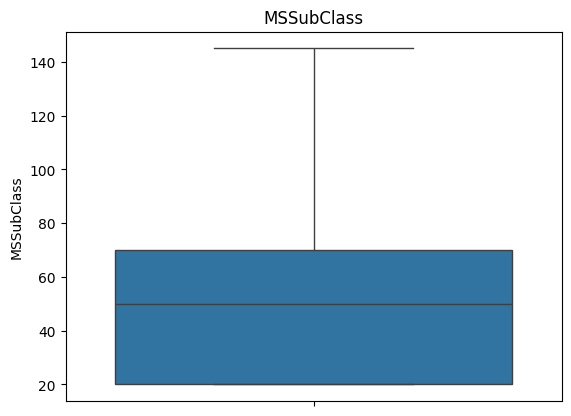

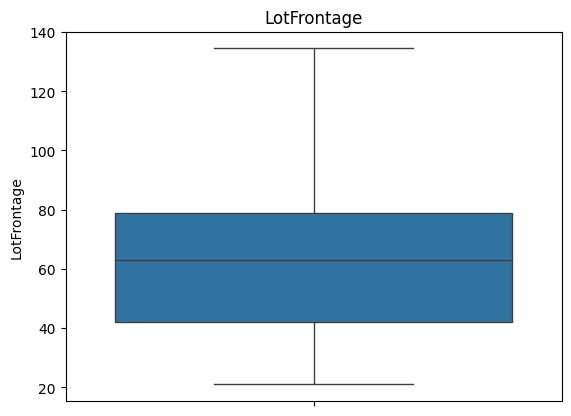

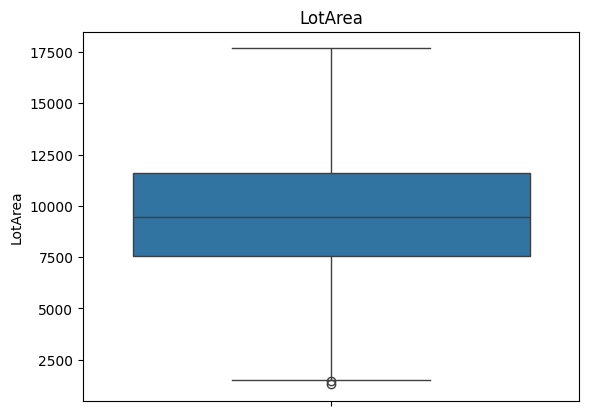

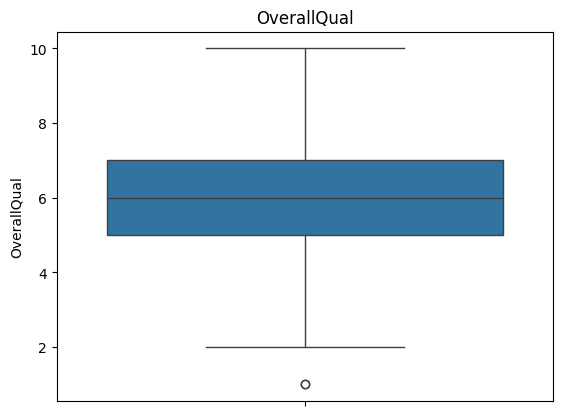

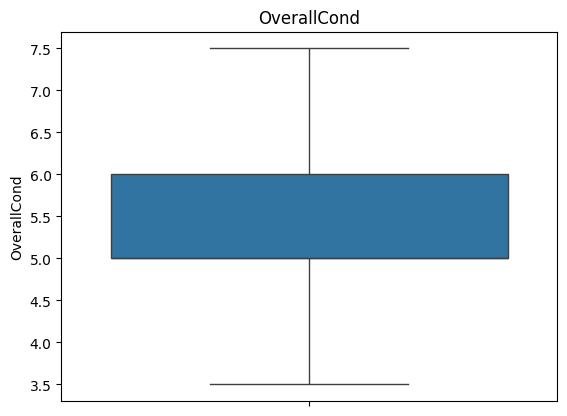

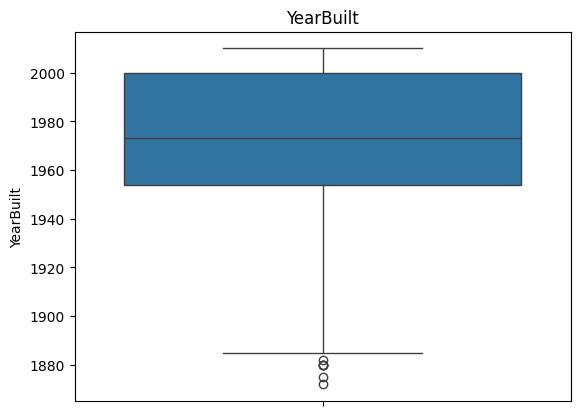

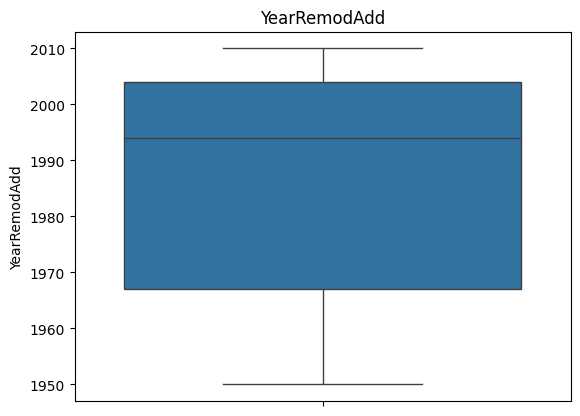

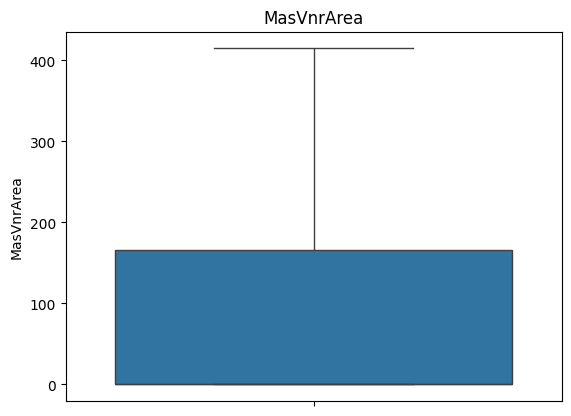

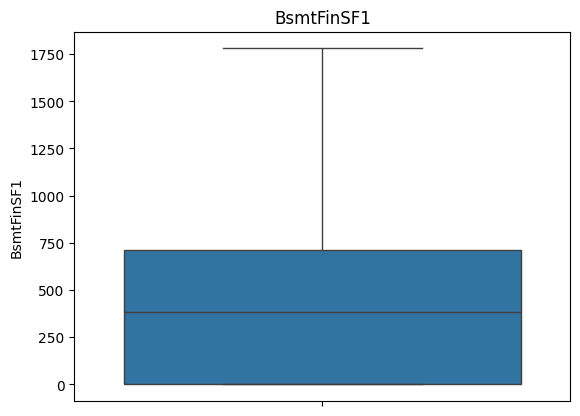

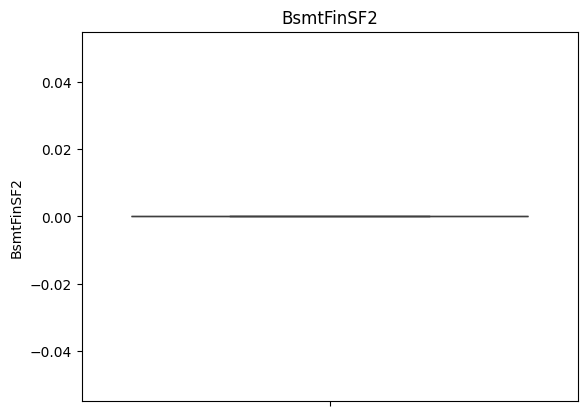

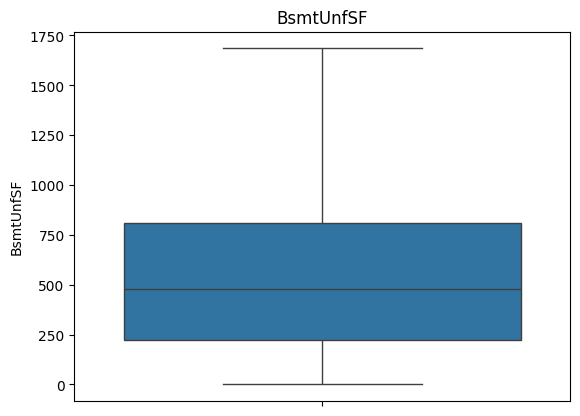

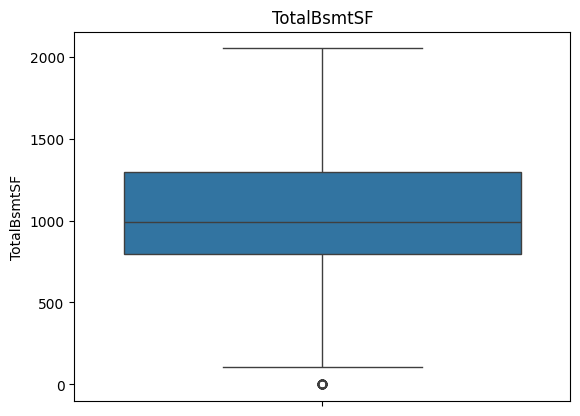

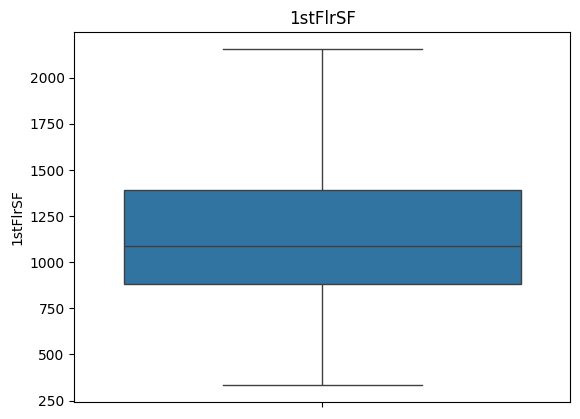

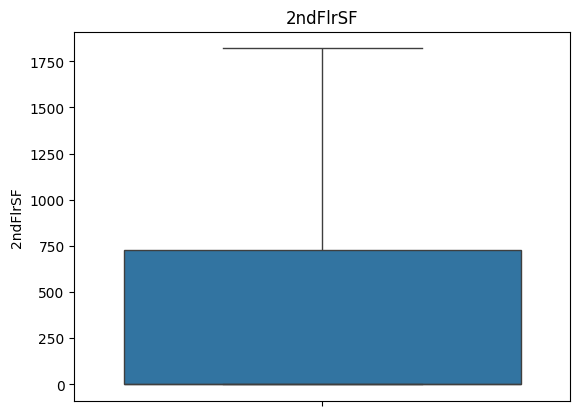

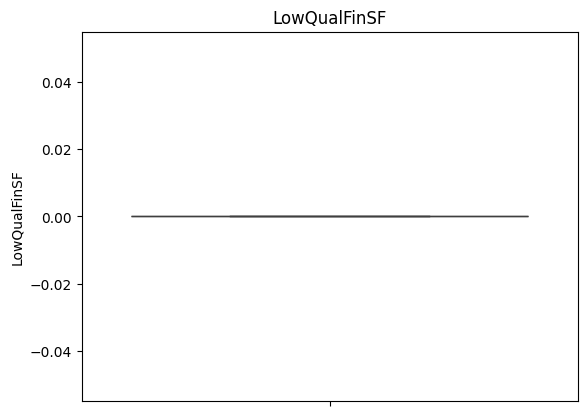

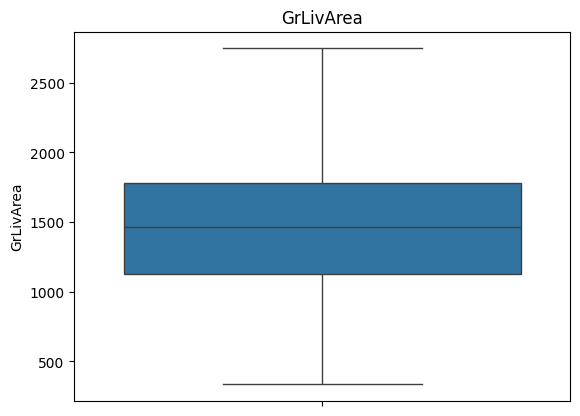

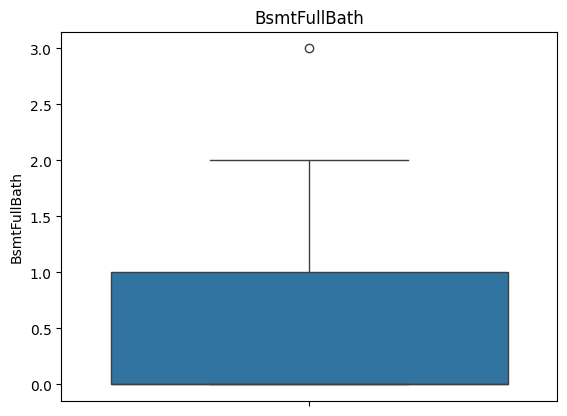

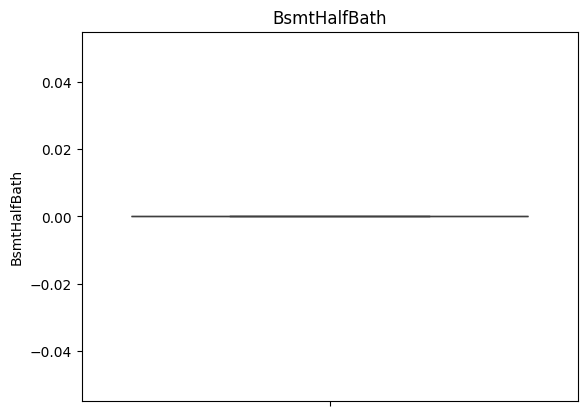

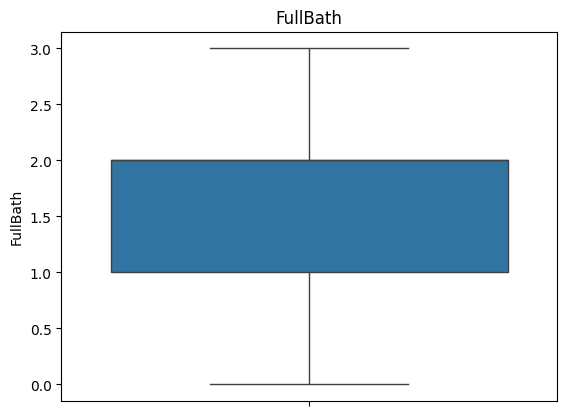

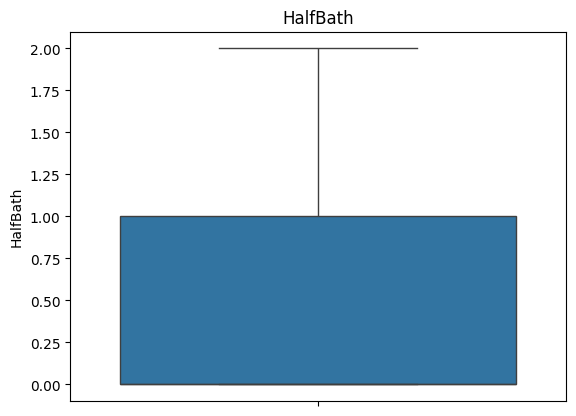

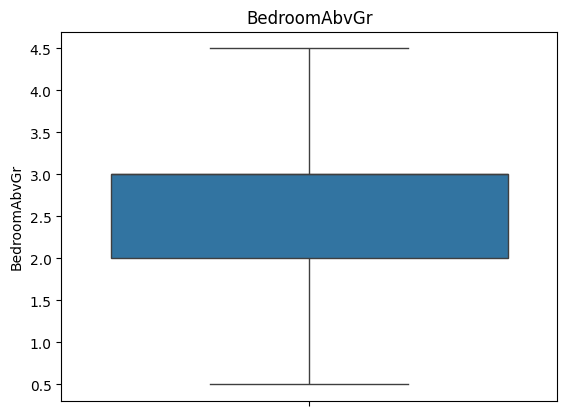

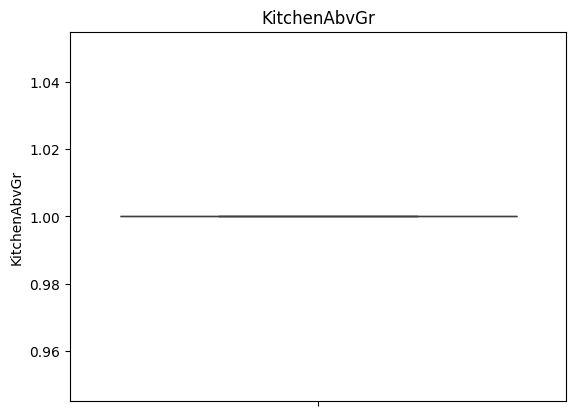

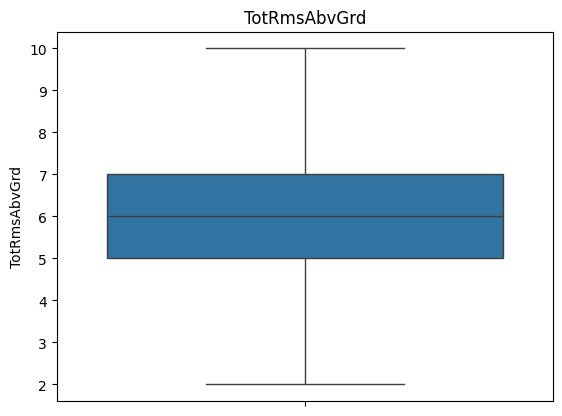

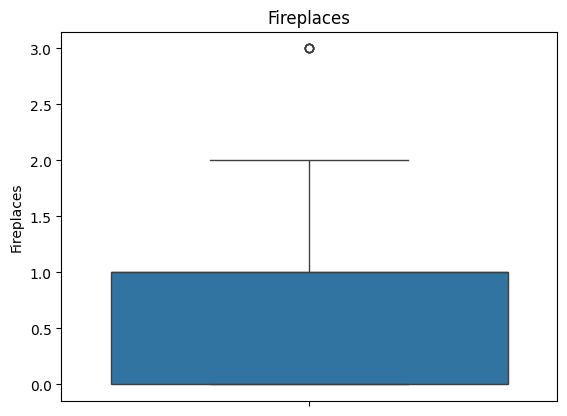

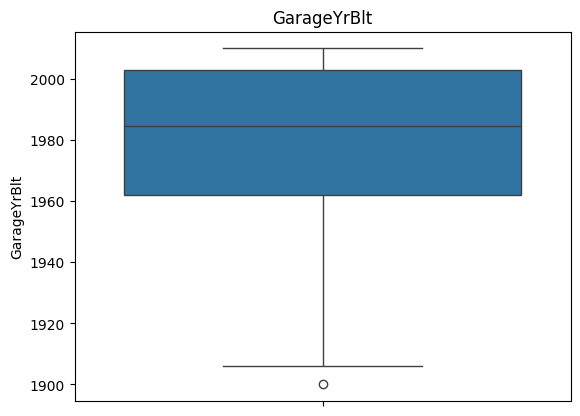

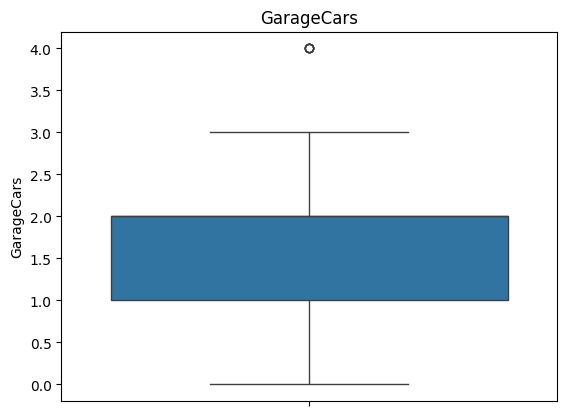

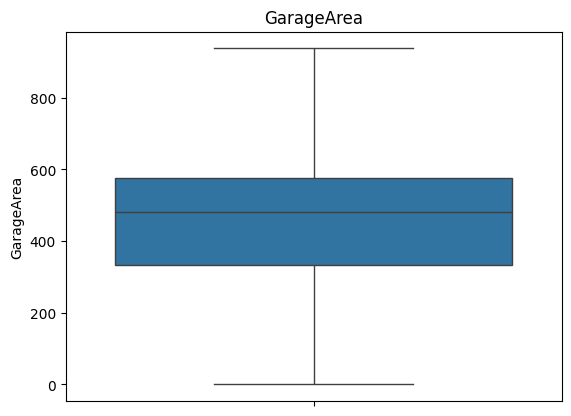

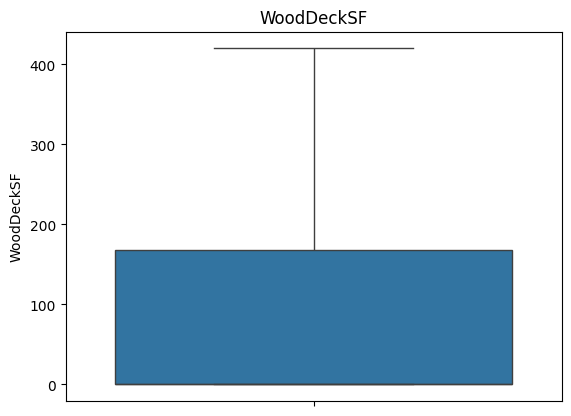

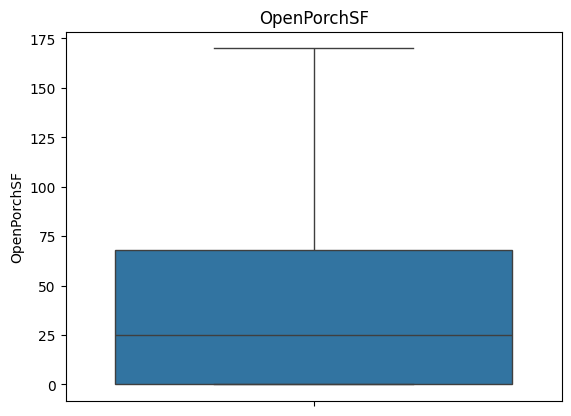

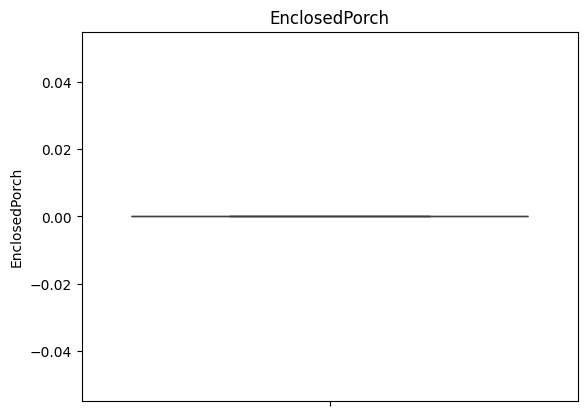

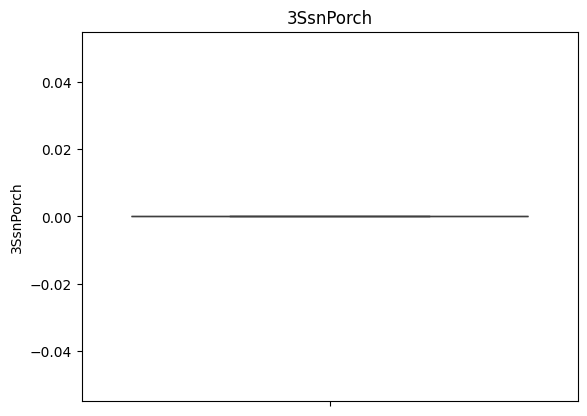

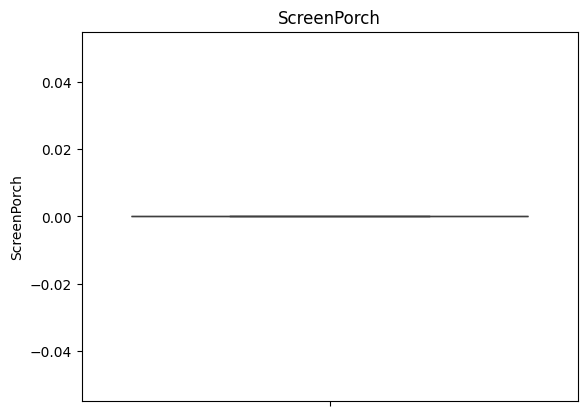

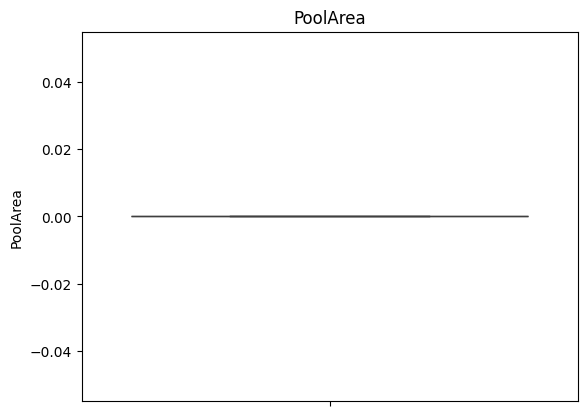

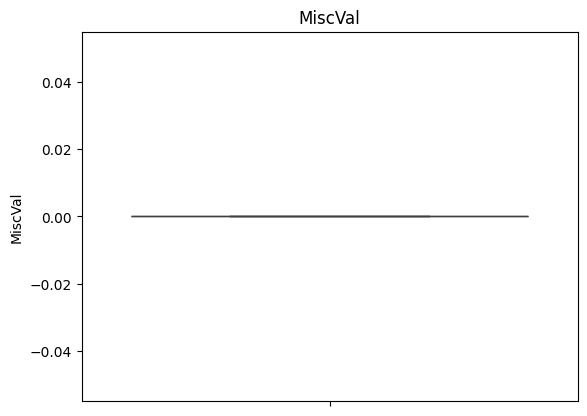

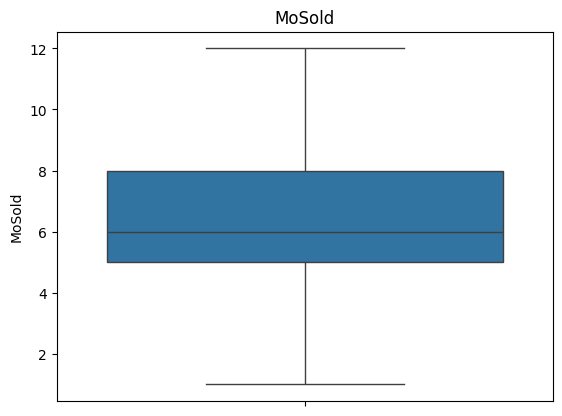

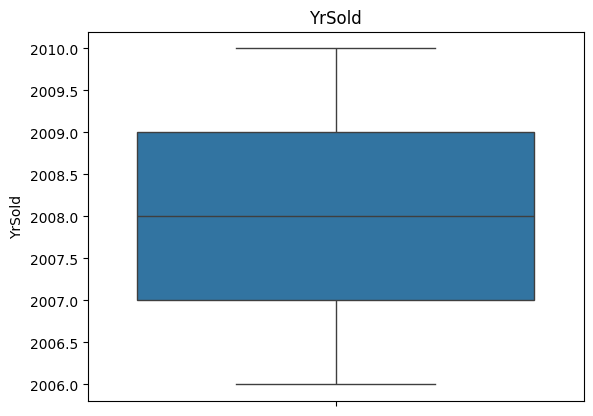

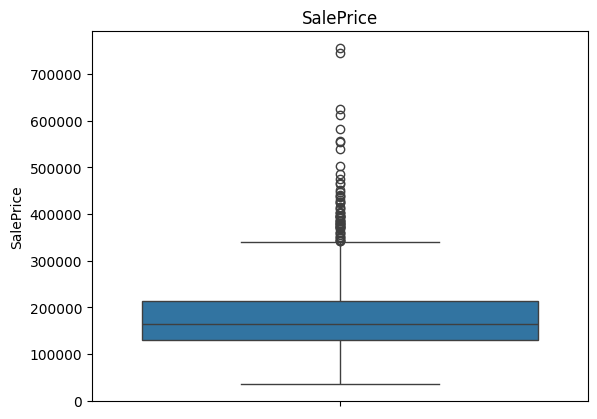

In [42]:
univariate_continuos(df)

In [43]:
def bivariate_continuos(df, target):

    numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64', 'uint8']]

    for col in numeric_cols:
        sns.regplot(x=col, y=target, data=df)
        plt.show()

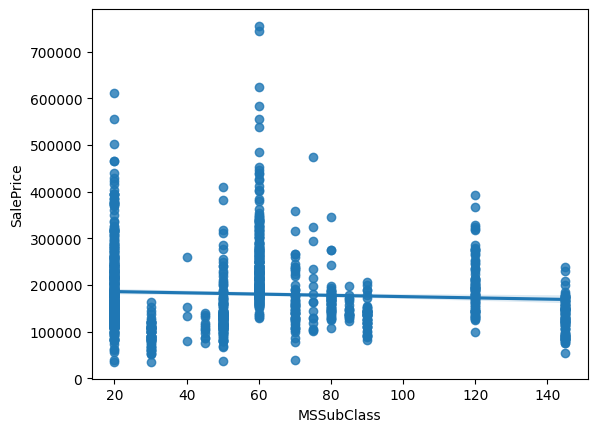

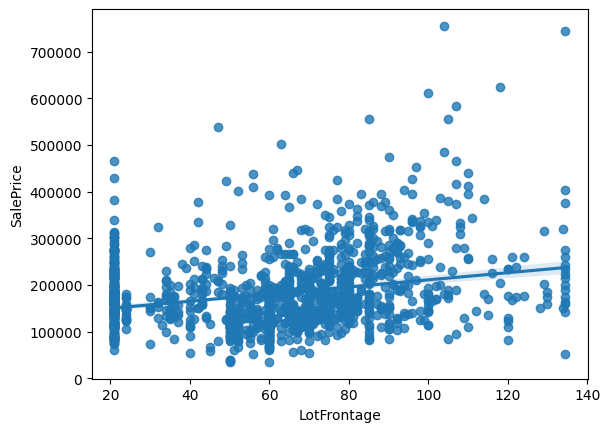

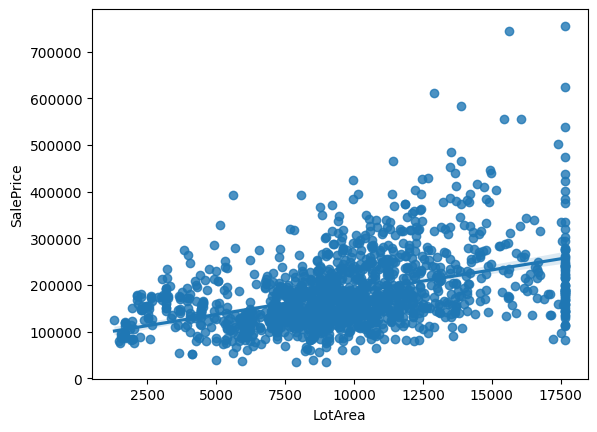

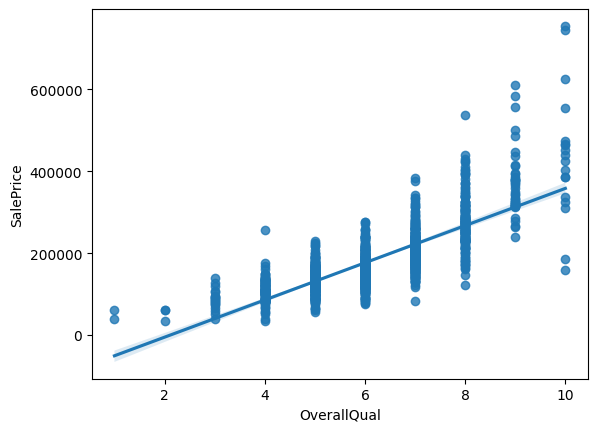

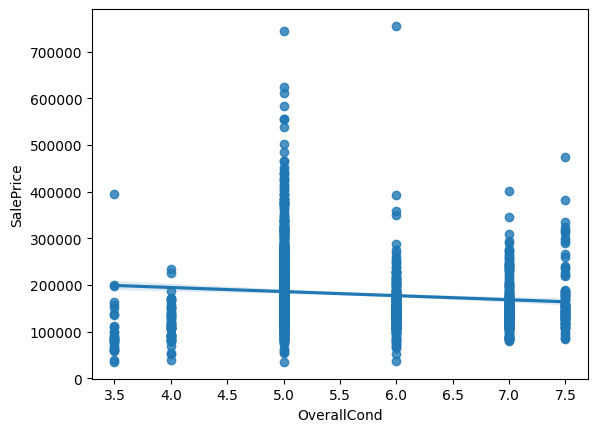

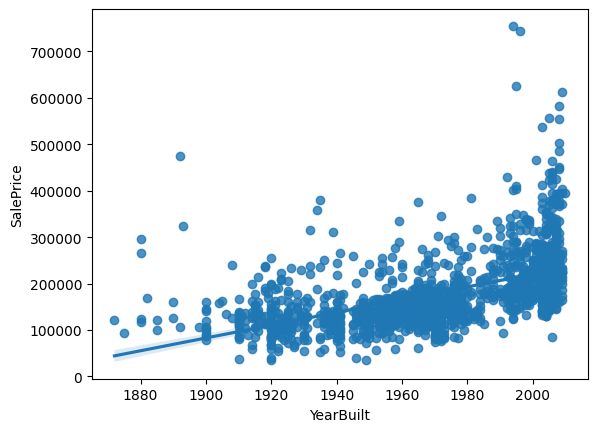

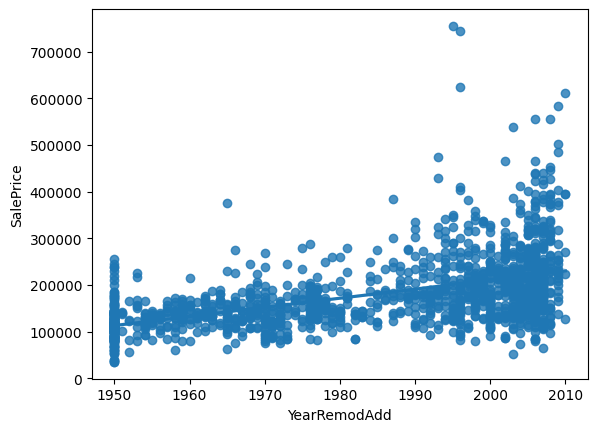

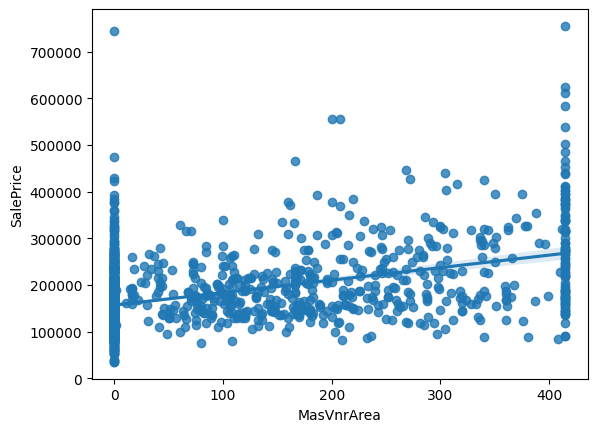

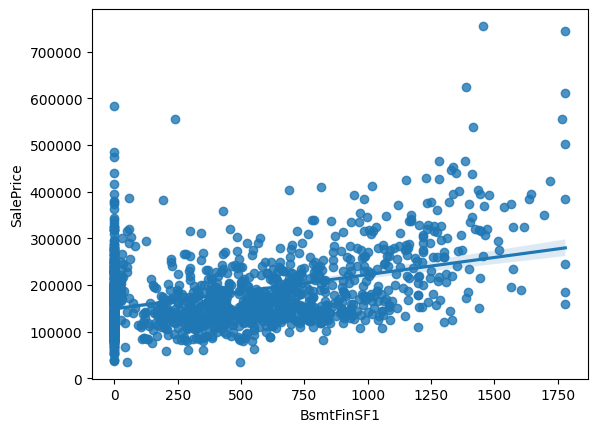

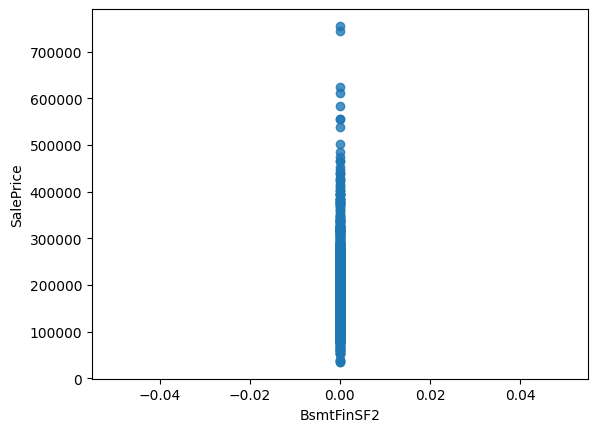

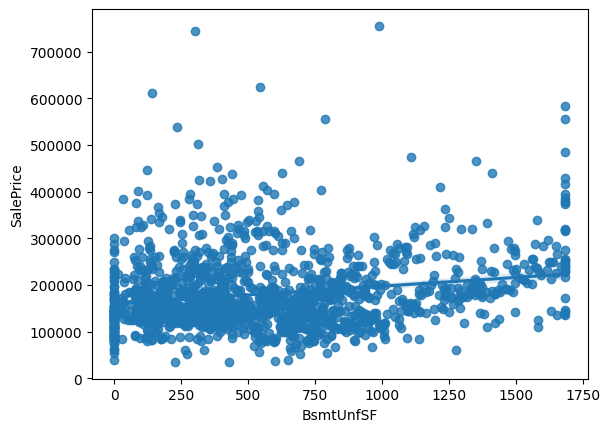

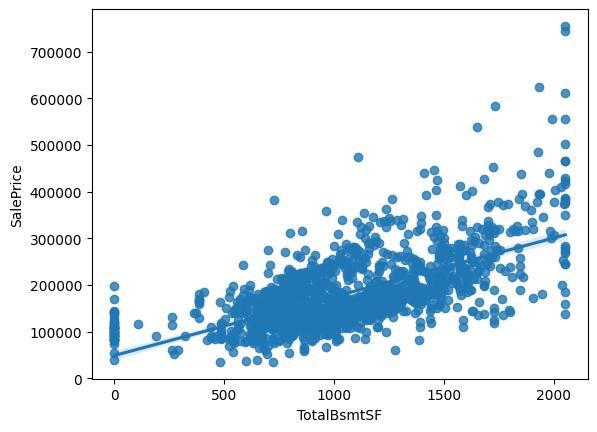

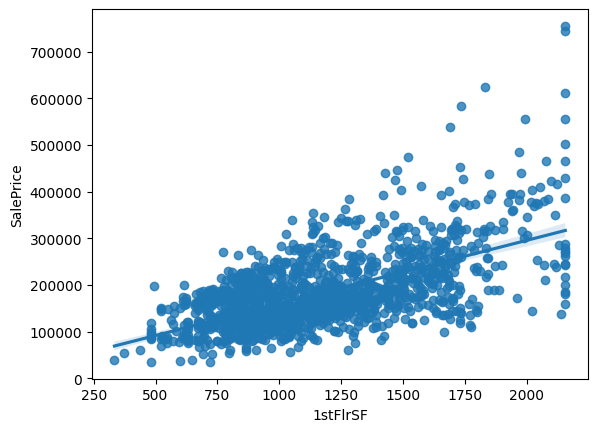

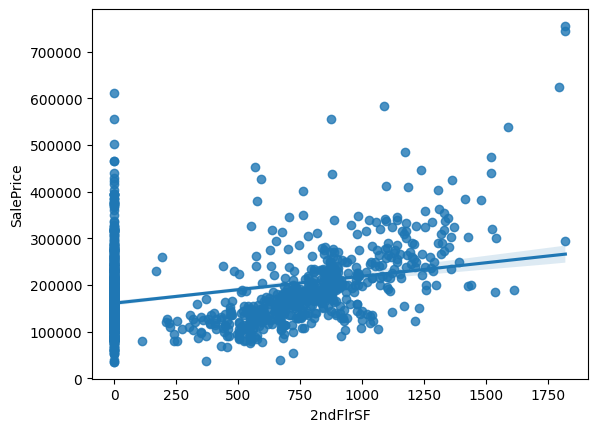

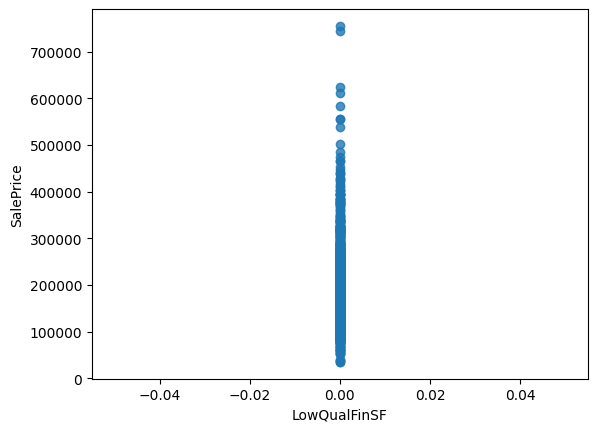

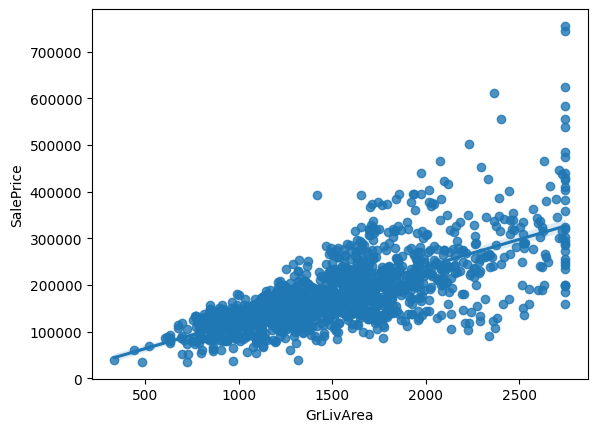

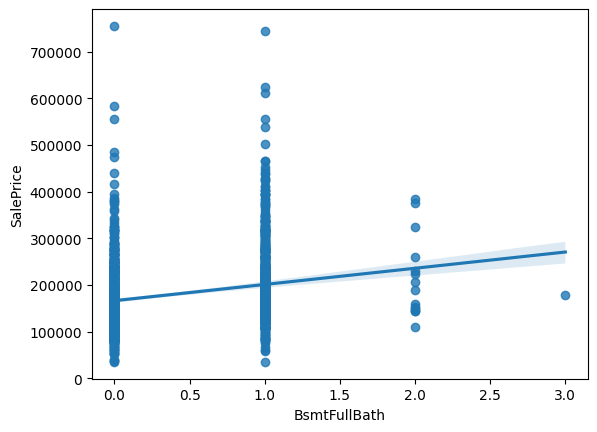

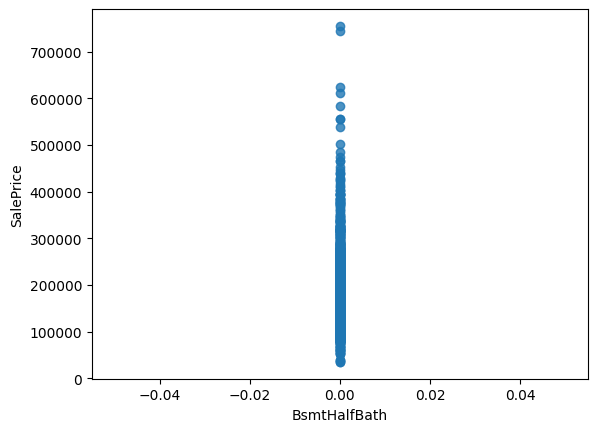

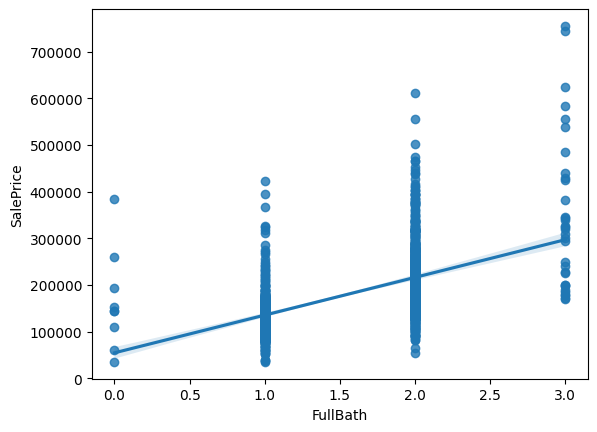

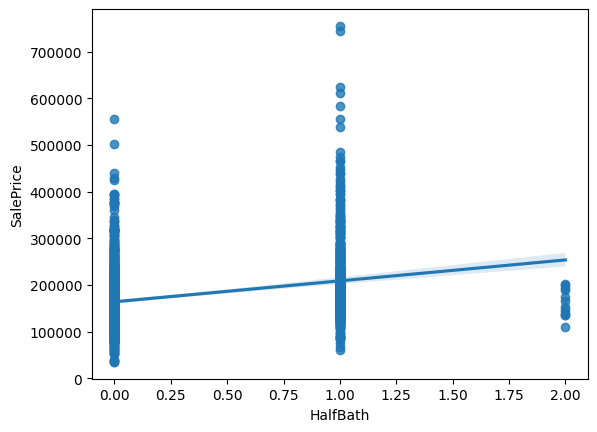

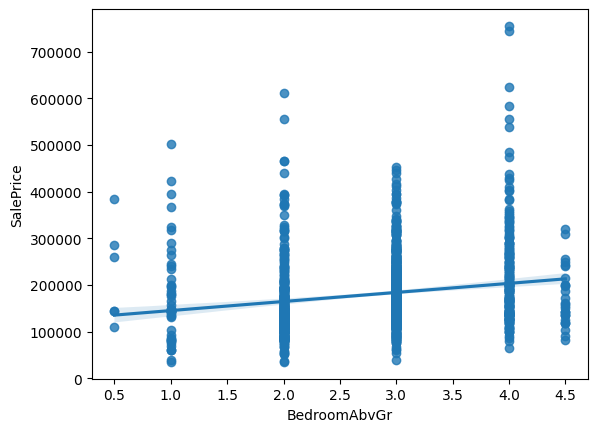

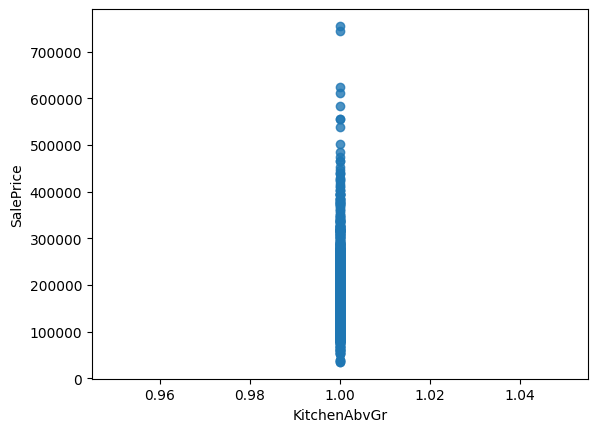

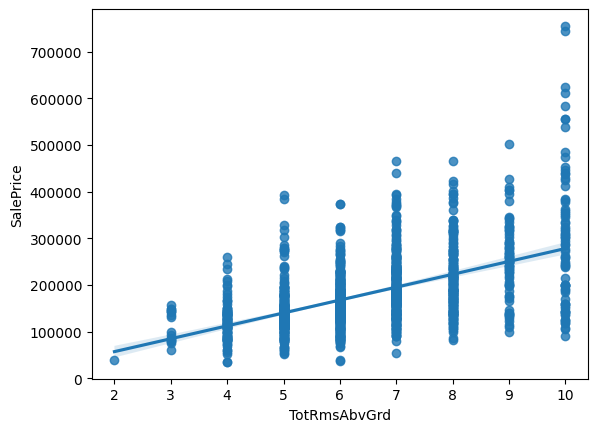

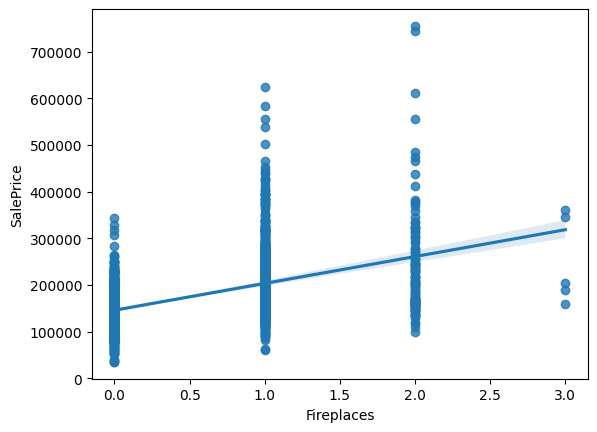

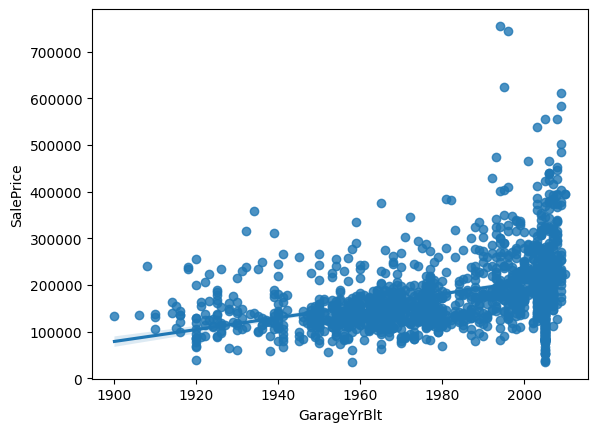

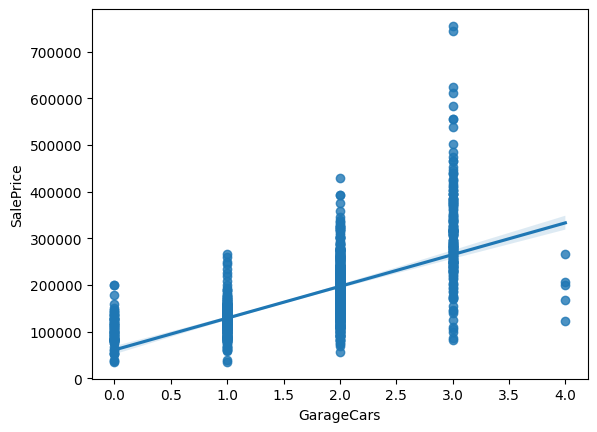

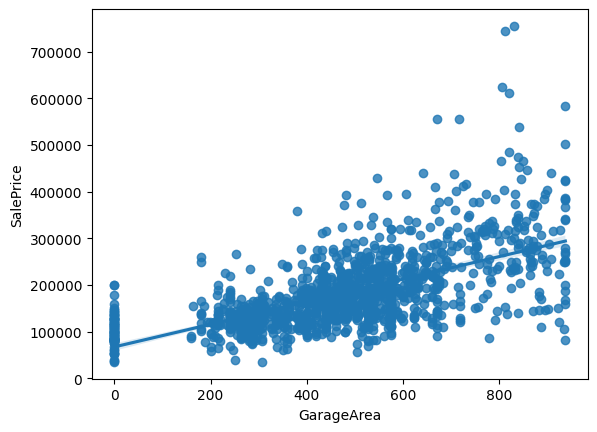

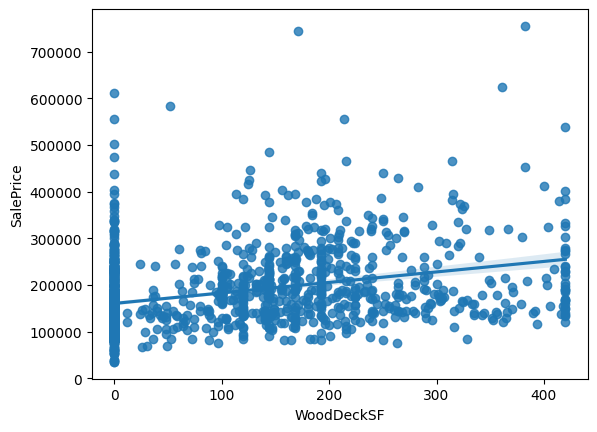

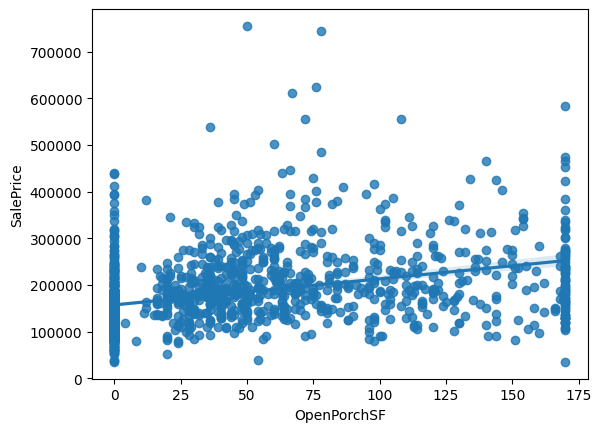

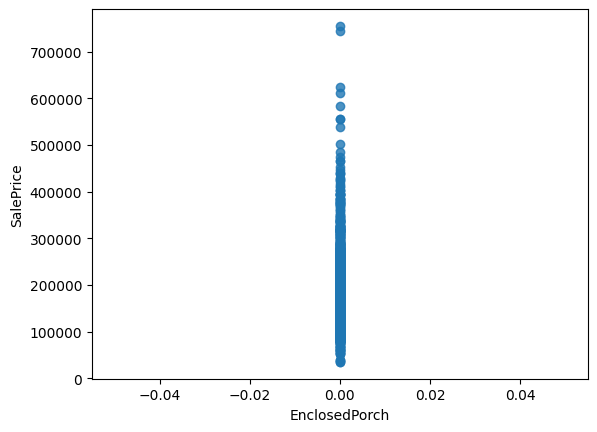

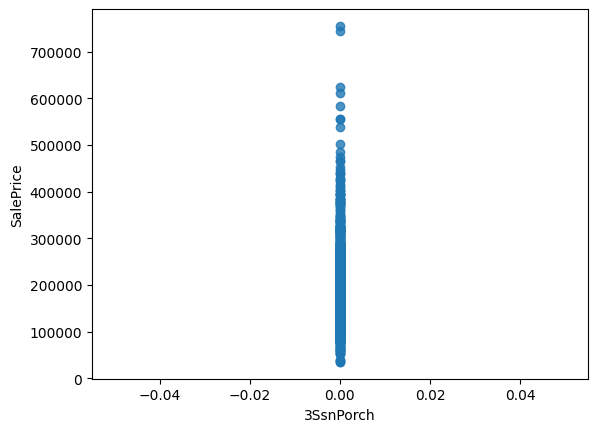

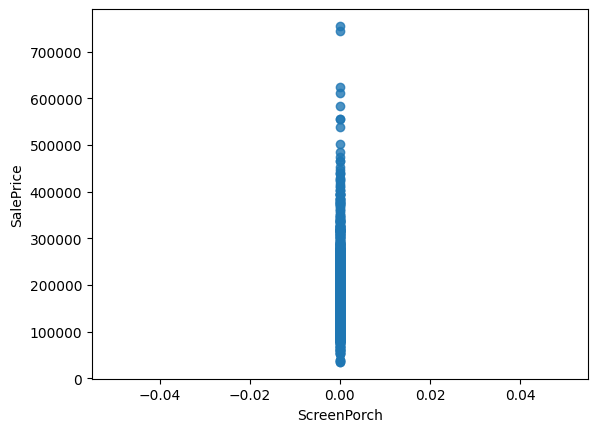

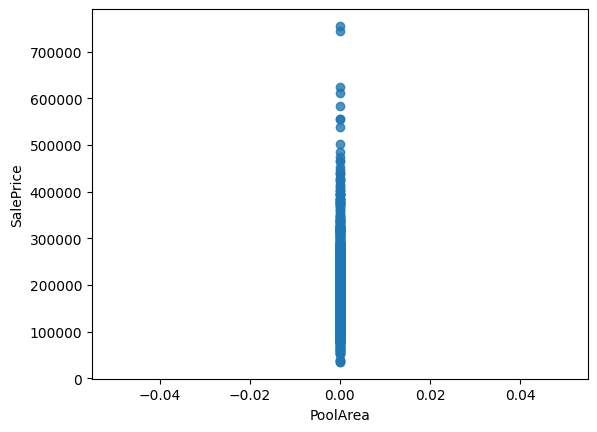

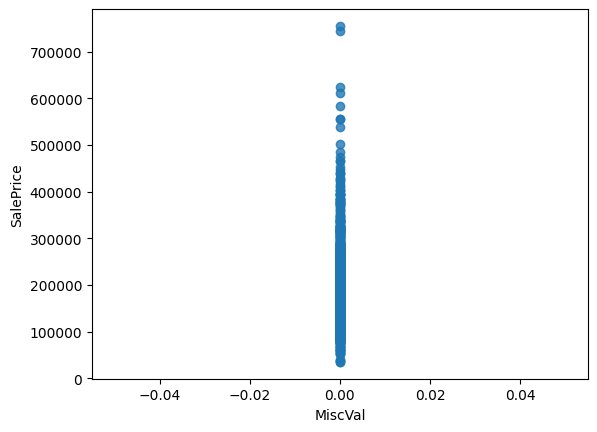

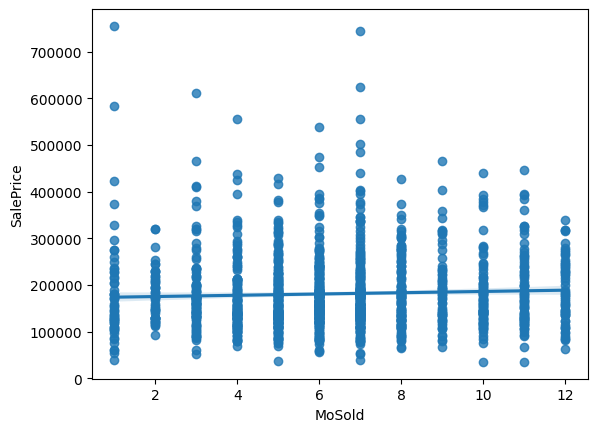

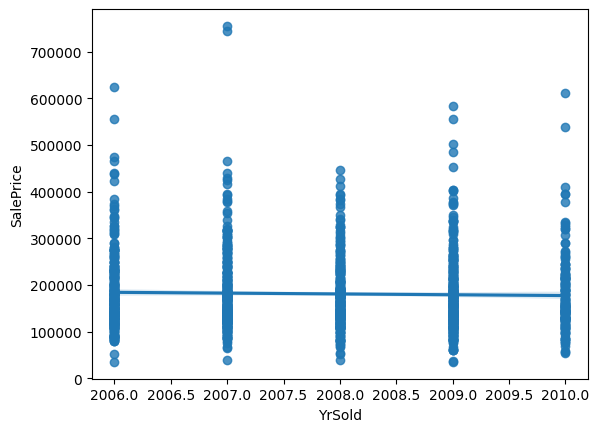

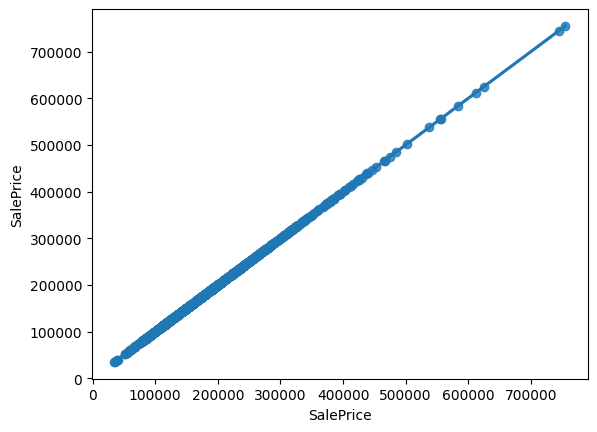

In [44]:
bivariate_continuos(df, 'SalePrice')

In [45]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(df[numeric_cols])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [46]:
df[numeric_cols].corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.282971 -0.403447     0.063390    -0.085384   
LotFrontage     -0.282971     1.000000  0.330769     0.195516    -0.062504   
LotArea         -0.403447     0.330769  1.000000     0.221440    -0.026507   
OverallQual      0.063390     0.195516  0.221440     1.000000    -0.131551   
OverallCond     -0.085384    -0.062504 -0.026507    -0.131551     1.000000   
YearBuilt        0.055306     0.056990  0.065656     0.572323    -0.399140   
YearRemodAdd     0.058578     0.078726  0.054477     0.550684     0.038429   
MasVnrArea       0.033295     0.110397  0.145698     0.419362    -0.155069   
BsmtFinSF1      -0.076423     0.046880  0.215819     0.229576    -0.045411   
BsmtFinSF2            NaN          NaN       NaN          NaN          NaN   
BsmtUnfSF       -0.132790     0.178772  0.087085     0.301613    -0.148518   
TotalBsmtSF     -0.249713     0.244855  0.359647     0.541114    -0.189163   
1stFlrSF        -0.259517     0.269244  0.458139     0.473842    -0.156582   
2ndFlrSF         0.330582     0.044854  0.121690     0.294675     0.007366   
LowQualFinSF          NaN          NaN       NaN          NaN          NaN   
GrLivArea        0.098235     0.223979  0.433863     0.597066    -0.114282   
BsmtFullBath    -0.002577     0.008696  0.119565     0.111098    -0.052096   
BsmtHalfBath          NaN          NaN       NaN          NaN          NaN   
FullBath         0.150567     0.140835  0.213867     0.550600    -0.225769   
HalfBath         0.204110    -0.002883  0.099250     0.273458    -0.070449   
BedroomAbvGr    -0.050319     0.186913  0.304688     0.118758     0.005306   
KitchenAbvGr          NaN          NaN       NaN          NaN          NaN   
TotRmsAbvGrd     0.044963     0.250583  0.395019     0.436571    -0.081397   
Fireplaces      -0.029667     0.073541  0.352335     0.396765    -0.036877   
GarageYrBlt      0.111552     0.041550 -0.021157     0.437998    -0.322381   
GarageCars      -0.016038     0.208001  0.308884     0.600671    -0.216238   
GarageArea      -0.085825     0.235366  0.344624     0.568557    -0.177911   
WoodDeckSF      -0.009879     0.011126  0.198278     0.246389    -0.011283   
OpenPorchSF      0.001883     0.089869  0.162041     0.358047    -0.082415   
EnclosedPorch         NaN          NaN       NaN          NaN          NaN   
3SsnPorch             NaN          NaN       NaN          NaN          NaN   
ScreenPorch           NaN          NaN       NaN          NaN          NaN   
PoolArea              NaN          NaN       NaN          NaN          NaN   
MiscVal               NaN          NaN       NaN          NaN          NaN   
MoSold          -0.003956     0.019615  0.003872     0.070815    -0.009981   
YrSold          -0.021216    -0.009269 -0.036860    -0.027347     0.046162   
SalePrice       -0.063602     0.258620  0.432207     0.790982    -0.106261   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.055306      0.058578    0.033295   -0.076423         NaN   
LotFrontage     0.056990      0.078726    0.110397    0.046880         NaN   
LotArea         0.065656      0.054477    0.145698    0.215819         NaN   
OverallQual     0.572323      0.550684    0.419362    0.229576         NaN   
OverallCond    -0.399140      0.038429   -0.155069   -0.045411         NaN   
YearBuilt       1.000000      0.592855    0.351558    0.252874         NaN   
YearRemodAdd    0.592855      1.000000    0.190586    0.126339         NaN   
MasVnrArea      0.351558      0.190586    1.000000    0.252159         NaN   
BsmtFinSF1      0.252874      0.126339    0.252159    1.000000         NaN   
BsmtFinSF2           NaN           NaN         NaN         NaN         NaN   
BsmtUnfSF       0.144190      0.178277    0.109239   -0.524935         NaN   
TotalBsmtSF     0.408059      0.301774    0.359288    0.466854         NaN   
1stFlrSF        0.287776      0.2466

In [47]:
def outlier_treatment(df, col):

    print('#########################')
    print(col)
    print('#########################')

    Q1 = df[col].quantile(0.25)
    print('Q1 is => ' + str(Q1))

    Q3 = df[col].quantile(0.75)
    print('Q3 is => ' + str(Q3))

    IQR = Q3 - Q1

    fence_low  = Q1-1.5*IQR
    print('Fence Low is => ' + str(fence_low))

    fence_high = Q3+1.5*IQR
    print('Fence High is => ' + str(fence_high))

    df.loc[(df[col] > fence_high), col] = fence_high
    df.loc[(df[col] < fence_low), col] = fence_low

    print('\n')

    return df

def outlier_treatment_max(df, col):

    print('#########################')
    print(col)
    print('#########################')

    Q1 = df[col].quantile(0.25)
    print('Q1 is => ' + str(Q1))

    Q3 = df[col].quantile(0.75)
    print('Q3 is => ' + str(Q3))

    IQR = Q3 - Q1

    fence_high = Q3+1.5*IQR
    print('Fence High is => ' + str(fence_high))

    df.loc[(df[col] > fence_high), col] = fence_high

    print('\n')

    return df

def outlier_treatment_min(df, col):

    print('#########################')
    print(col)
    print('#########################')

    Q1 = df[col].quantile(0.25)
    print('Q1 is => ' + str(Q1))

    Q3 = df[col].quantile(0.75)
    print('Q3 is => ' + str(Q3))

    IQR = Q3 - Q1

    fence_low  = Q1-1.5*IQR
    print('Fence Low is => ' + str(fence_low))

    df.loc[(df[col] < fence_low), col] = fence_low

    print('\n')

    return df

In [48]:
df = outlier_treatment_max(df, 'MSSubClass')
df = outlier_treatment_max(df, 'LotFrontage')
df = outlier_treatment_max(df, 'LotArea')
df = outlier_treatment(df, 'OverallCond')
df = outlier_treatment_max(df, 'MasVnrArea')
df = outlier_treatment_max(df, 'BsmtFinSF1')
df = outlier_treatment_max(df, 'BsmtFinSF2')
df = outlier_treatment_max(df, 'BsmtUnfSF')
df = outlier_treatment_max(df, 'TotalBsmtSF')
df = outlier_treatment_max(df, '1stFlrSF')
df = outlier_treatment_max(df, '2ndFlrSF')
df = outlier_treatment_max(df, 'LowQualFinSF')
df = outlier_treatment_max(df, 'GrLivArea')
df = outlier_treatment_max(df, 'BsmtHalfBath')
df = outlier_treatment(df, 'BedroomAbvGr')
df = outlier_treatment(df, 'KitchenAbvGr')
df = outlier_treatment_max(df, 'TotRmsAbvGrd')
df = outlier_treatment_max(df, 'GarageArea')
df = outlier_treatment_max(df, 'WoodDeckSF')
df = outlier_treatment_max(df, 'OpenPorchSF')
df = outlier_treatment_max(df, 'EnclosedPorch')
df = outlier_treatment_max(df, '3SsnPorch')
df = outlier_treatment_max(df, 'ScreenPorch')
df = outlier_treatment_max(df, 'PoolArea')
df = outlier_treatment_max(df, 'MiscVal')

#########################
MSSubClass
#########################
Q1 is => 20.0
Q3 is => 70.0
Fence High is => 145.0


#########################
LotFrontage
#########################
Q1 is => 42.0
Q3 is => 79.0
Fence High is => 134.5


#########################
LotArea
#########################
Q1 is => 7553.5
Q3 is => 11601.5
Fence High is => 17673.5


#########################
OverallCond
#########################
Q1 is => 5.0
Q3 is => 6.0
Fence Low is => 3.5
Fence High is => 7.5


#########################
MasVnrArea
#########################
Q1 is => 0.0
Q3 is => 166.0
Fence High is => 415.0


#########################
BsmtFinSF1
#########################
Q1 is => 0.0
Q3 is => 712.25
Fence High is => 1780.625


#########################
BsmtFinSF2
#########################
Q1 is => 0.0
Q3 is => 0.0
Fence High is => 0.0


#########################
BsmtUnfSF
#########################
Q1 is => 223.0
Q3 is => 808.0
Fence High is => 1685.5


#########################
TotalBsmtSF
##########

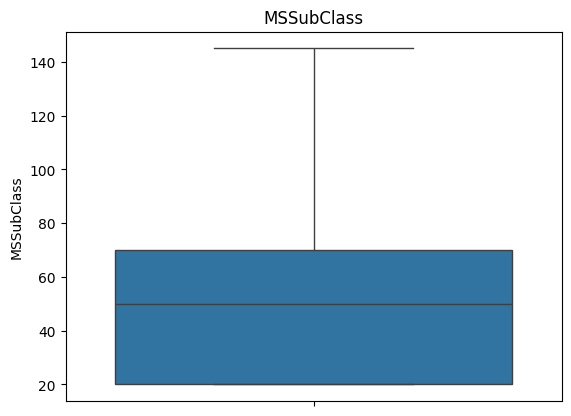

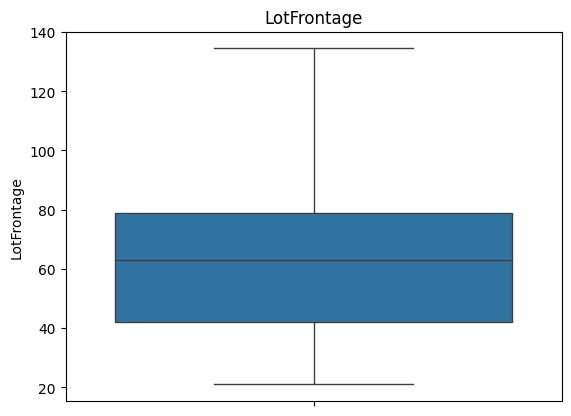

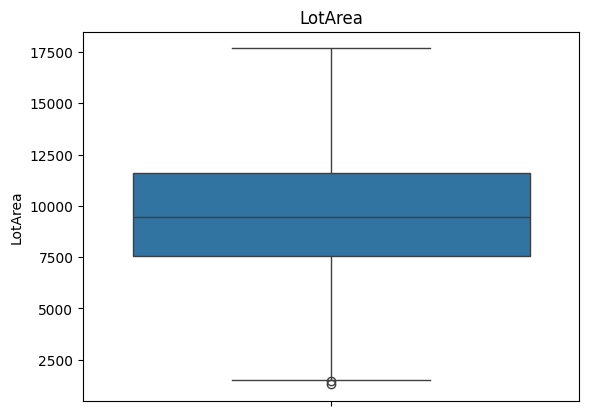

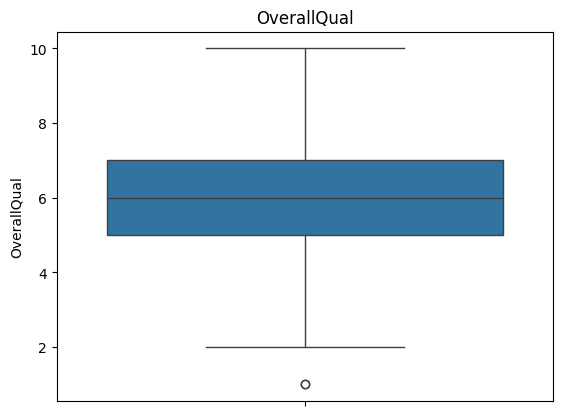

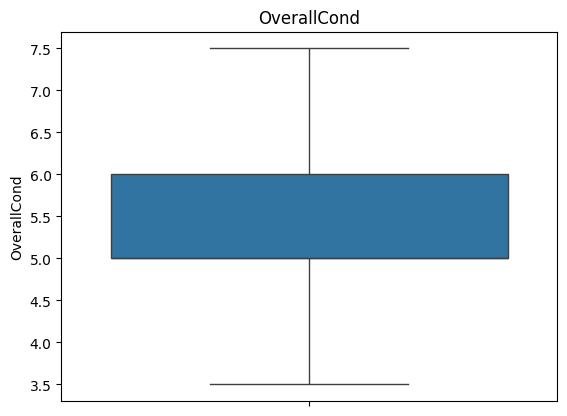

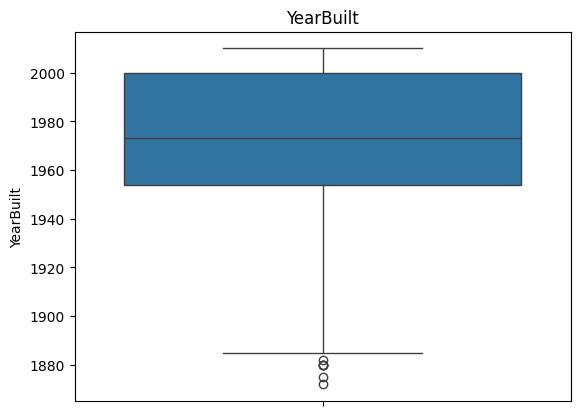

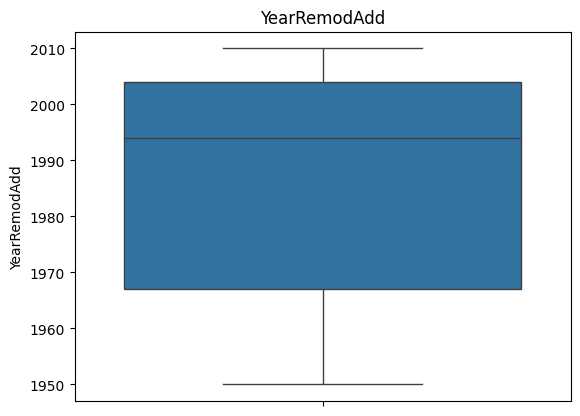

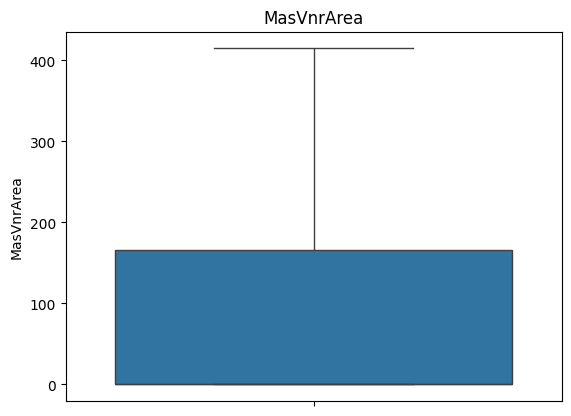

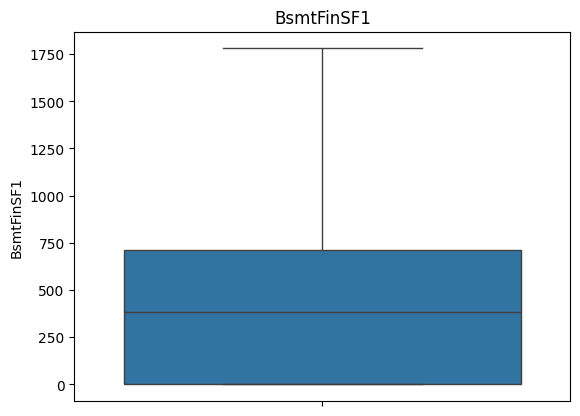

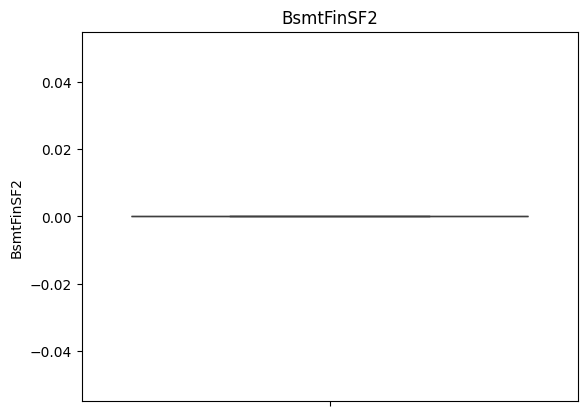

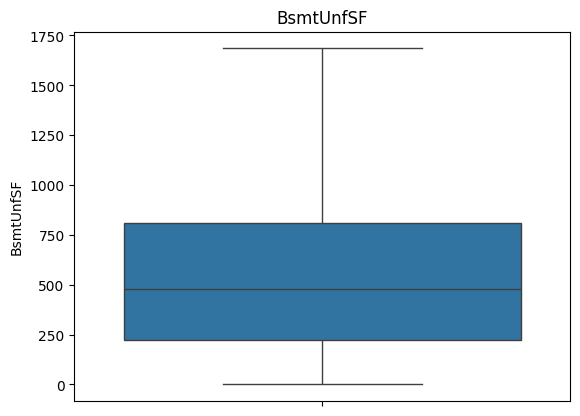

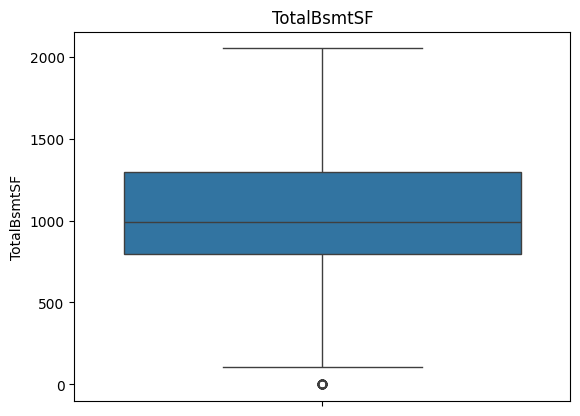

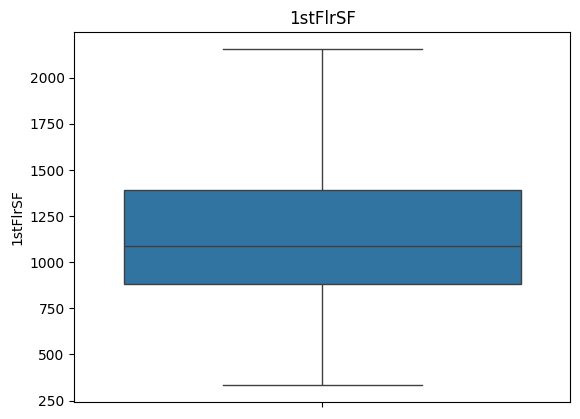

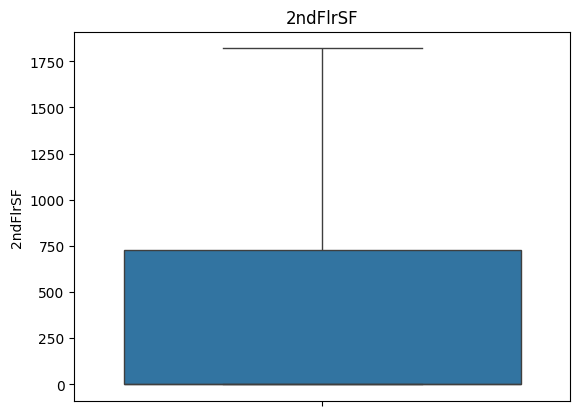

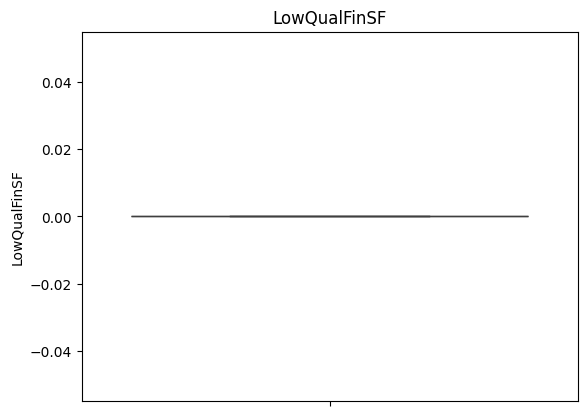

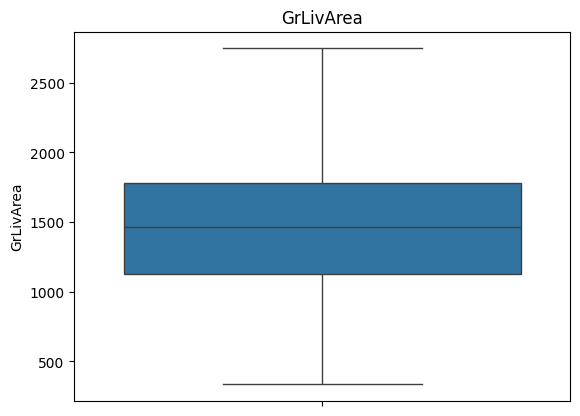

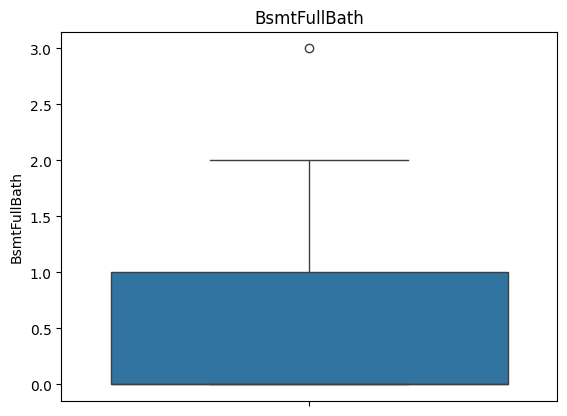

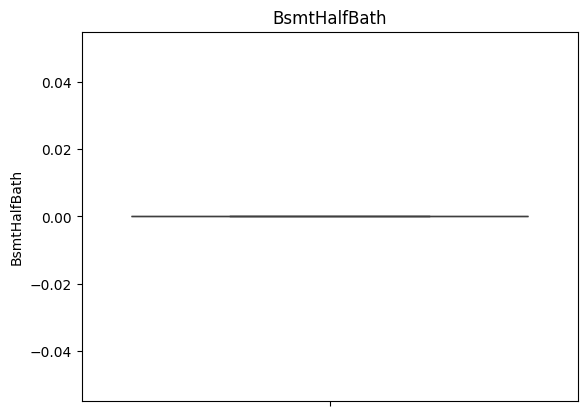

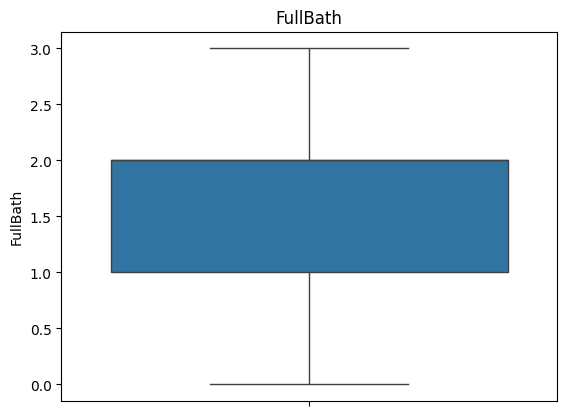

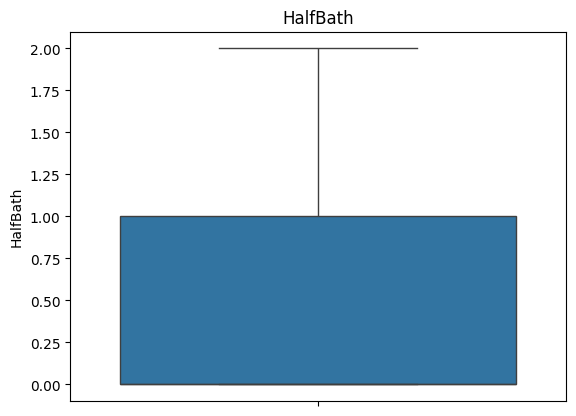

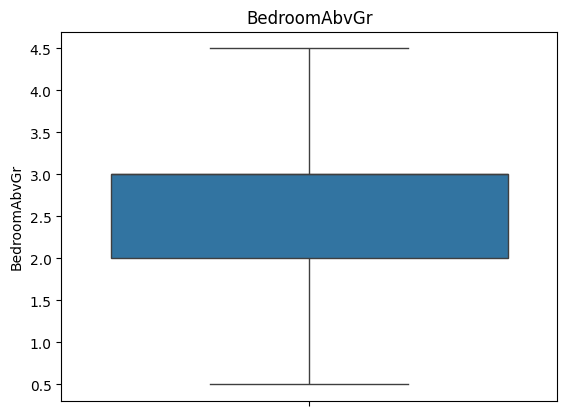

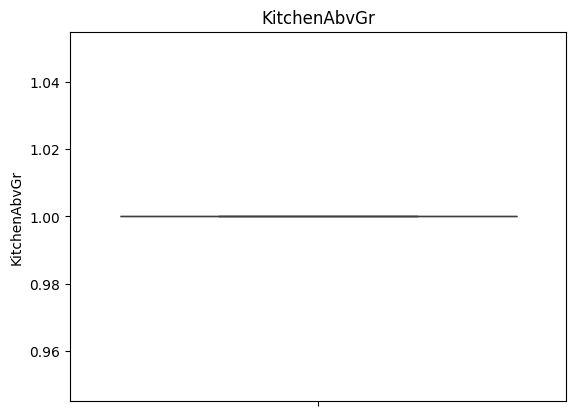

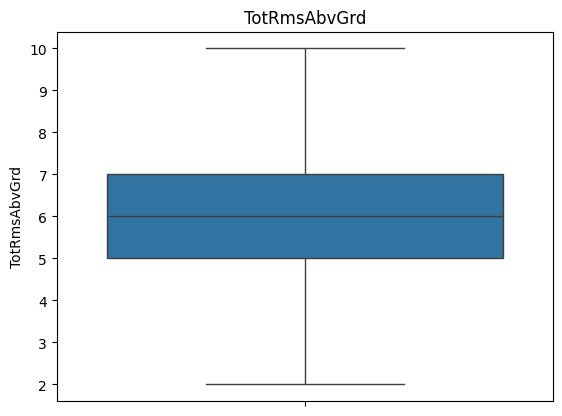

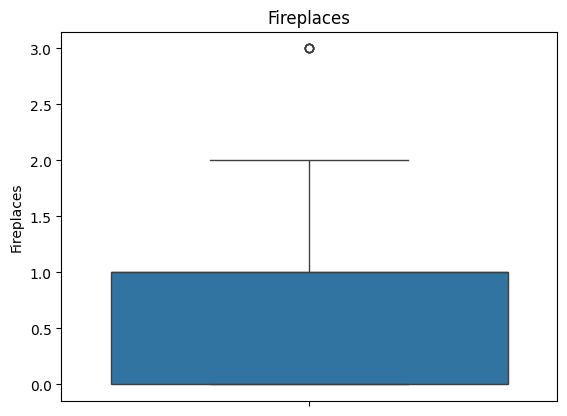

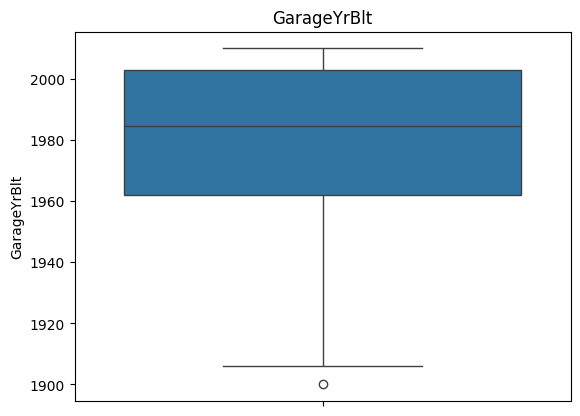

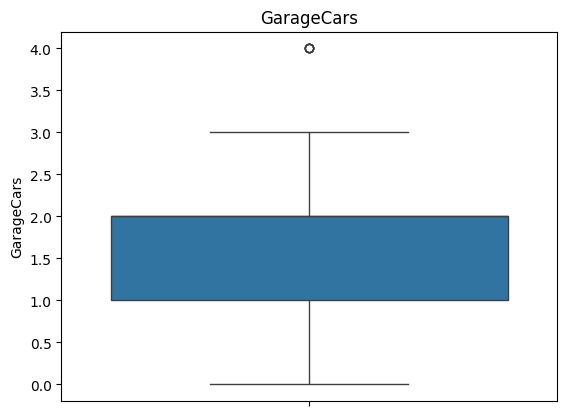

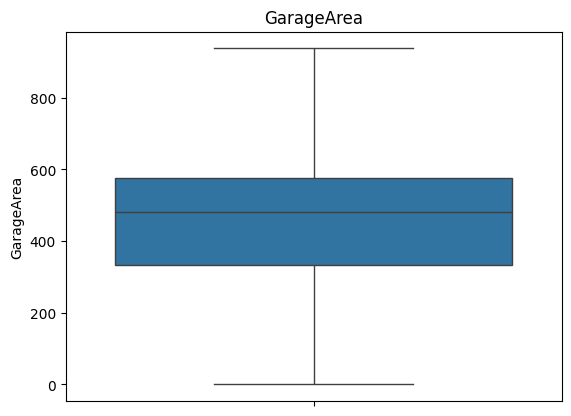

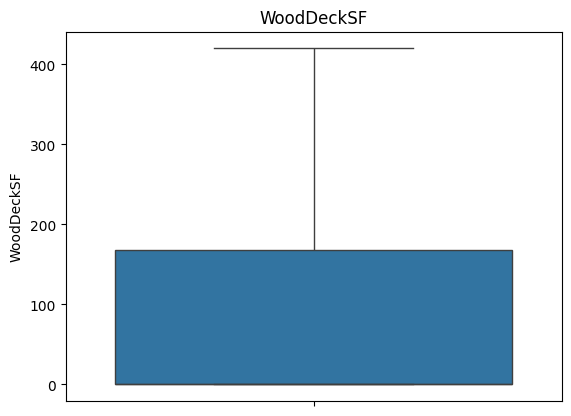

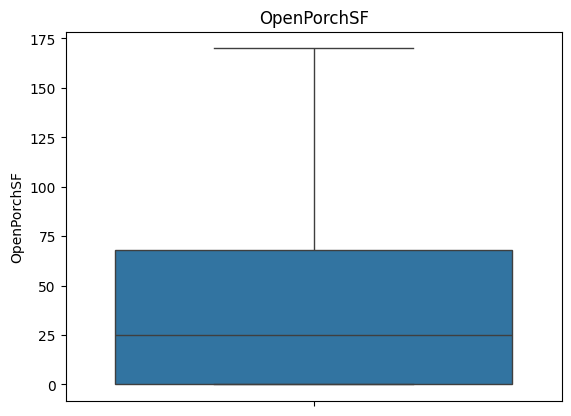

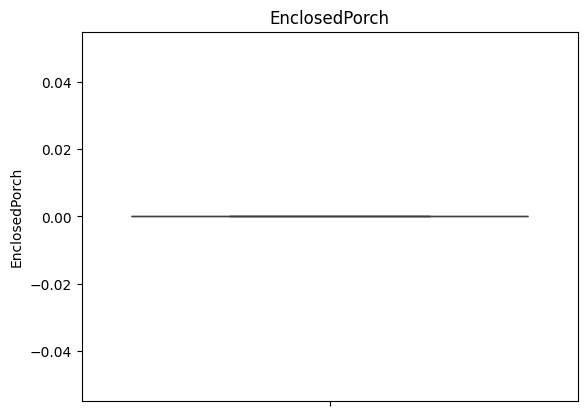

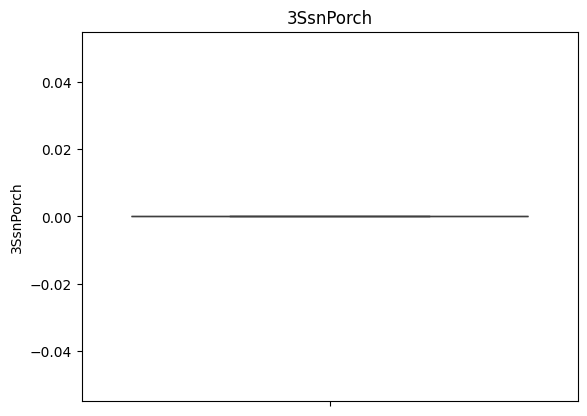

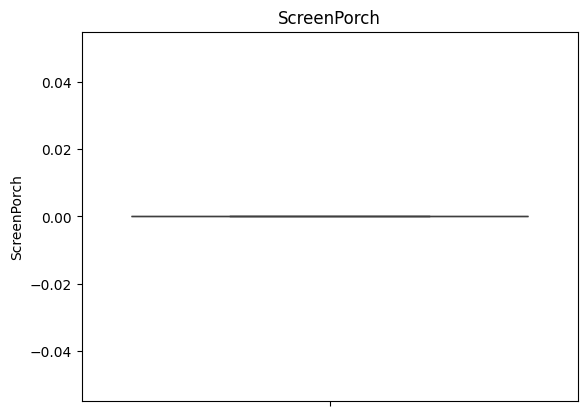

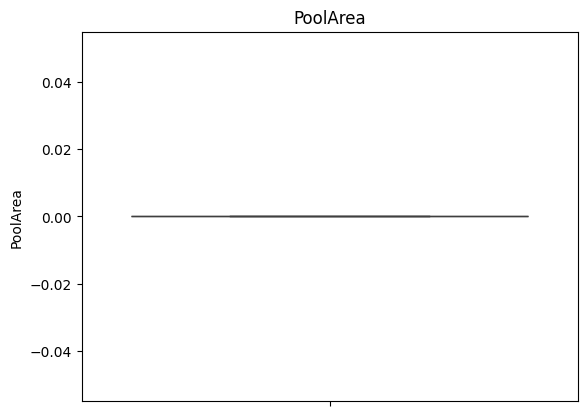

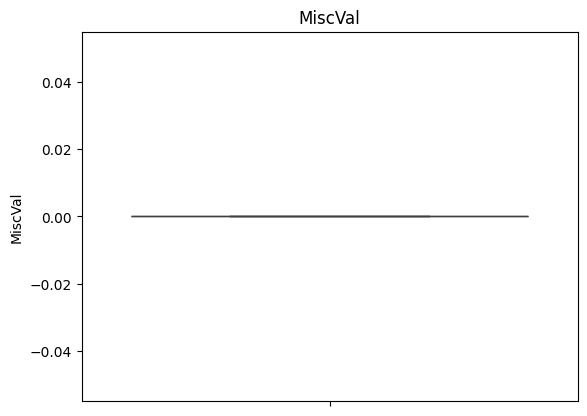

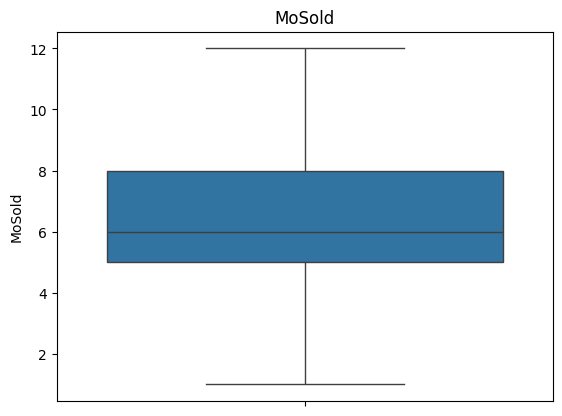

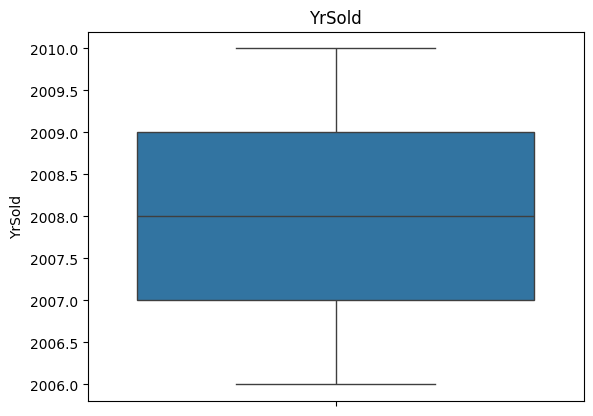

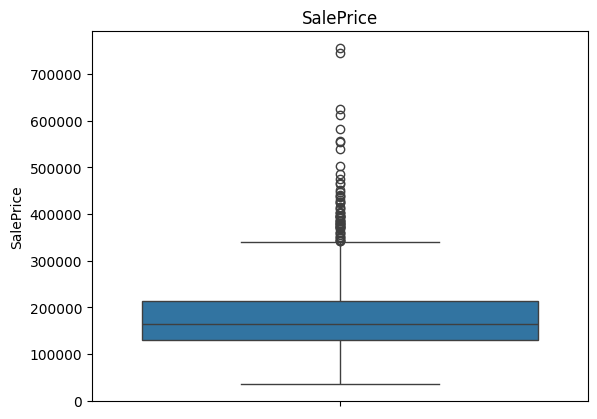

In [49]:
univariate_continuos(df)

In [50]:
na_cat_cols

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [51]:
cat_cols = [cname for cname in df.columns if df[cname].dtype in ['object']]

for col in cat_cols:
    if col in na_cat_cols:
        na_dummy = pd.get_dummies(df[col], prefix=col)
        del na_dummy[col+'_'+'na']
        df = pd.concat([df, na_dummy], axis=1)
        del df[col]
    else:
        dummy = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, dummy], axis=1)
        del df[col]

In [52]:
list(df.columns)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_fv',
 'MSZoning_rh',
 'MSZoning_rl',
 'MSZoning_rm',
 'Street_pave',
 'Alley_grvl',
 'Alley_pave',
 'LotShape_ir2',
 'LotShape_ir3',
 'LotShape_reg',
 'LandContour_hls',
 'LandContour_low',
 'LandContour_lvl',
 'Utilities_nosewa',
 'LotConfig_culdsac',
 'LotConfig_fr2',
 'LotConfig_fr3',
 'LotConfig_inside',
 'LandSlope_mod',
 'LandSlope_sev',
 'Neighborhood_blueste',
 'Neighborhood_brdale',
 'Neighborhood_brkside',
 'Neighborhood_clea

In [53]:
df.shape

(1460, 262)

In [54]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numeric_cols = [cname for cname in df.columns if
                                df[cname].dtype in ['int64', 'float64']]

df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [56]:
df_train.describe()

MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.291675     0.350641     0.502100     0.565676     0.513345   
std       0.305785     0.237280     0.221465     0.155529     0.239528   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.193833     0.368536     0.444444     0.375000   
50%       0.240000     0.343612     0.495354     0.555556     0.375000   
75%       0.400000     0.502203     0.619578     0.666667     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2  ...  \
count  1021.000000   1021.000000  1021.000000  1021.000000      1021.0  ...   
mean      0.719215      0.582305     0.217375     0.248840         0.0  ...   
std       0.219897      0.343843     0.326294     0.243935         0.0  ...   
min       0.000000      0.000000     0.000000     0.000000         0.0  ...   
25%       0.594203      0.283333     0.000000     0.000000         0.0  ...   
50%       0.731884      0.733333     0.000000     0.220147         0.0  ...   
75%       0.927536      0.900000     0.385542     0.399860         0.0  ...   
max       1.000000      1.000000     1.000000     1.000000         0.0  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1021.000000  1021.000000         1021.0     1021.0       1021.0   
mean      0.214729     0.252555            0.0        0.0          0.0   
std       0.276373     0.310329            0.0        0.0          0.0   
min       0.000000     0.000000            0.0        0.0          0.0   
25%       0.000000     0.000000            0.0        0.0          0.0   
50%       0.000000     0.147059            0.0        0.0          0.0   
75%       0.400000     0.411765            0.0        0.0          0.0   
max       1.000000     1.000000            0.0        0.0          0.0   

       PoolArea  MiscVal       MoSold       YrSold    SalePrice  
count    1021.0   1021.0  1021.000000  1021.000000  1021.000000  
mean        0.0      0.0     0.480634     0.454946     0.202113  
std         0.0      0.0     0.249954     0.334756     0.109835  
min         0.0      0.0     0.000000     0.000000     0.000000  
25%         0.0      0.0     0.272727     0.250000     0.131371  
50%         0.0      0.0     0.454545     0.500000     0.173726  
75%         0.0      0.0     0.636364     0.750000     0.248715  
max         0.0      0.0     1.000000     1.000000     1.000000  

[8 rows x 37 columns]

In [57]:
df_test.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  438.000000   438.000000  438.000000   438.000000   438.000000   
mean     0.254977     0.353399    0.509877     0.568493     0.505422   
std      0.285334     0.236175    0.223452     0.149493     0.244518   
min      0.000000     0.000000   -0.010928     0.000000     0.000000   
25%      0.000000     0.169604    0.387429     0.444444     0.375000   
50%      0.240000     0.387665    0.488408     0.555556     0.375000   
75%      0.320000     0.519824    0.631186     0.666667     0.625000   
max      1.000000     1.000000    1.000000     1.000000     1.000000   

        YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
count  438.000000    438.000000  438.000000  438.000000       438.0  ...   
mean     0.719195      0.577816    0.221060    0.242512         0.0  ...   
std      0.216762      0.345295    0.320871    0.242035         0.0  ...   
min      0.021739      0.000000    0.000000    0.000000         0.0  ...   
25%      0.594203      0.266667    0.000000    0.000000         0.0  ...   
50%      0.724638      0.716667    0.000000    0.202457         0.0  ...   
75%      0.934783      0.900000    0.419277    0.398596         0.0  ...   
max      0.992754      1.000000    1.000000    1.000000         0.0  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  438.000000   438.000000          438.0      438.0        438.0   
mean     0.227104     0.244897            0.0        0.0          0.0   
std      0.281220     0.304967            0.0        0.0          0.0   
min      0.000000     0.000000            0.0        0.0          0.0   
25%      0.000000     0.000000            0.0        0.0          0.0   
50%      0.000000     0.141176            0.0        0.0          0.0   
75%      0.428571     0.386765            0.0        0.0          0.0   
max      1.000000     1.000000            0.0        0.0          0.0   

       PoolArea  MiscVal      MoSold      YrSold   SalePrice  
count     438.0    438.0  438.000000  438.000000  438.000000  
mean        0.0      0.0    0.491283    0.452055    0.204051  
std         0.0      0.0    0.236178    0.326177    0.111530  
min         0.0      0.0    0.000000    0.000000    0.004166  
25%         0.0      0.0    0.363636    0.250000    0.135016  
50%         0.0      0.0    0.454545    0.500000    0.180774  
75%         0.0      0.0    0.636364    0.750000    0.247552  
max         0.0      0.0    1.000000    1.000000    0.800940  

[8 rows x 37 columns]

In [58]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [59]:
y_test = df_test.pop('SalePrice')
X_test = df_test

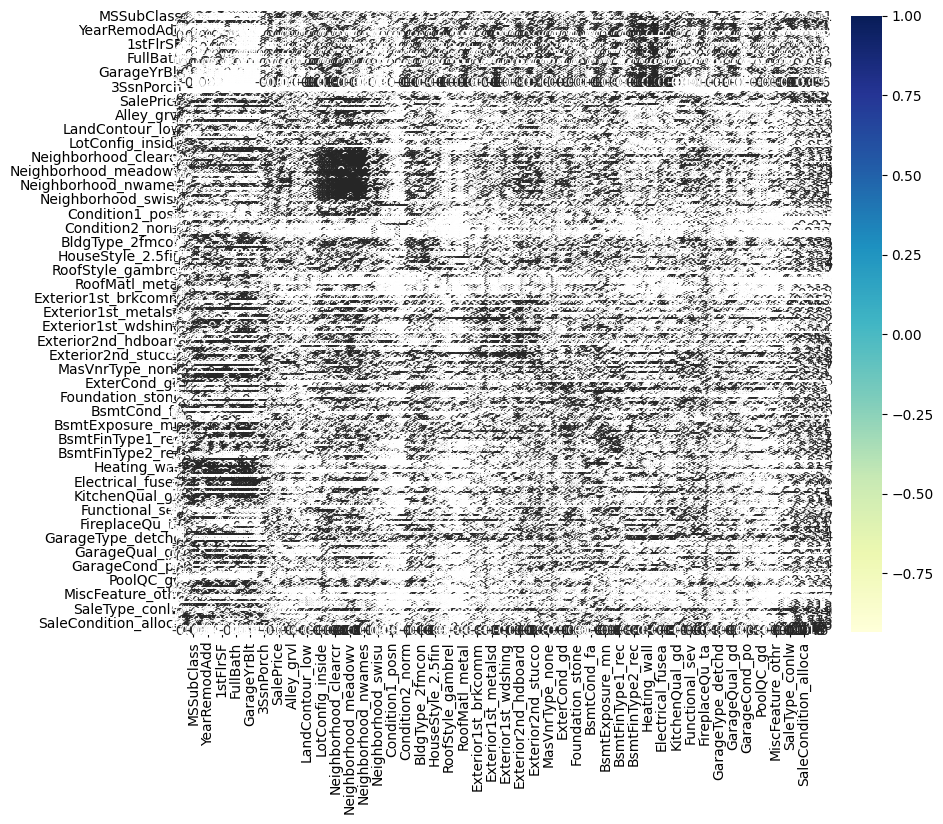

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [62]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [63]:
model_cv.best_params_

{'alpha': 7.0}

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.037682      0.009639         0.019015        0.006371      0.0001   
1       0.061350      0.003691         0.023958        0.004156       0.001   
2       0.064614      0.010260         0.028386        0.004125        0.01   
3       0.052481      0.013022         0.022735        0.005746        0.05   
4       0.060913      0.014720         0.024484        0.005569         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.851279           0.804989           0.724803   
1   {'alpha': 0.001}           0.851607           0.805035           0.725248   
2    {'alpha': 0.01}           0.854387           0.805376           0.729446   
3    {'alpha': 0.05}           0.861357           0.805385           0.743910   
4     {'alpha': 0.1}           0.865598           0.804303           0.756172   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.882392  ...         0.829059        0.059282               25   
1           0.882549  ...         0.829266        0.059185               23   
2           0.883946  ...         0.831107        0.058241               22   
3           0.887635  ...         0.836216        0.054619               21   
4           0.889438  ...         0.839448        0.051265               20   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.953074            0.946989            0.952470   
1            0.953073            0.946988            0.952469   
2            0.953042            0.946959            0.952449   
3            0.952528            0.946503            0.952089   
4            0.951502            0.945680            0.951348   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.949987            0.949785          0.950461         0.002172  
1            0.949987            0.949785          0.950461         0.002172  
2            0.949955            0.949754          0.950432         0.002174  
3            0.949424            0.949252          0.949959         0.002185  
4            0.948379            0.948278          0.949037         0.002177  

[5 rows x 21 columns]

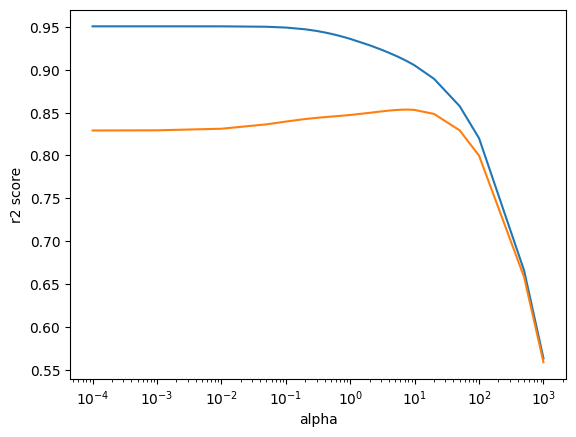

In [71]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [73]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

# Define functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm1_ridge = Ridge(alpha=10)
lm1_ridge.fit(X_train, y_train)

# Predict
y_train_pred = lm1_ridge.predict(X_train)
y_test_pred = lm1_ridge.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm1_ridge.coef_ != 0)))
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.9026537793512098
Test R2 Score => 0.8685778533775241
Count of variables => 248

Trained AIC => -6367.7194269026795
Test AIC => -2289.324438929169

Trained BIC => -5081.371056361702
Test BIC => -1223.8653033209164


In [75]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

# Define functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm2_ridge = Ridge(alpha=100)
lm2_ridge.fit(X_train, y_train)

# Predict
y_train_pred = lm2_ridge.predict(X_train)
y_test_pred = lm2_ridge.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm2_ridge.coef_ != 0)))
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.8296998890451277
Test R2 Score => 0.8140393181283926
Count of variables => 248

Trained AIC => -5796.686041530662
Test AIC => -2137.285603785492

Trained BIC => -4510.337670989684
Test BIC => -1071.8264681772396


In [76]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

# Define functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm3_ridge = Ridge(alpha=1000)
lm3_ridge.fit(X_train, y_train)

# Predict
y_train_pred = lm3_ridge.predict(X_train)
y_test_pred = lm3_ridge.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm3_ridge.coef_ != 0)))
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.5970942132203197
Test R2 Score => 0.5772614519735495
Count of variables => 248

Trained AIC => -4917.46157498205
Test AIC => -1777.591841831802

Trained BIC => -3631.113204441072
Test BIC => -712.1327062235493


In [77]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

# Define functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm4_ridge = Ridge(alpha=1)
lm4_ridge.fit(X_train, y_train)

# Predict
y_train_pred = lm4_ridge.predict(X_train)
y_test_pred = lm4_ridge.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm4_ridge.coef_ != 0)))
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.9317943572312433
Test R2 Score => 0.8536694133329019
Count of variables => 248

Trained AIC => -6730.936714477147
Test AIC => -2242.2597100494345

Trained BIC => -5444.58834393617
Test BIC => -1176.8005744411819


In [78]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

# Define functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm5_ridge = Ridge(alpha=0.1)
lm5_ridge.fit(X_train, y_train)

# Predict
y_train_pred = lm5_ridge.predict(X_train)
y_test_pred = lm5_ridge.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm5_ridge.coef_ != 0)))
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.9448803049037645
Test R2 Score => 0.7738446886052591
Count of variables => 248

Trained AIC => -6948.430343697683
Test AIC => -2051.574821202529

Trained BIC => -5662.081973156706
Test BIC => -986.1156855942766


In [79]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

# Define functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm6_ridge = Ridge(alpha=7)
lm6_ridge.fit(X_train, y_train)

# Predict
y_train_pred = lm6_ridge.predict(X_train)
y_test_pred = lm6_ridge.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm6_ridge.coef_ != 0)))
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.908190592522139
Test R2 Score => 0.8700375273191856
Count of variables => 248

Trained AIC => -6427.50830722255
Test AIC => -2294.2164163858124

Trained BIC => -5141.159936681572
Test BIC => -1228.7572807775598


In [80]:
# ridge model parameters
ridge_model_parameters = list(lm6_ridge.coef_)
ridge_model_parameters.insert(0, lm6_ridge.intercept_)
ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, ridge_model_parameters))

[('constant', -0.032),
 ('MSSubClass', -0.02),
 ('LotFrontage', 0.003),
 ('LotArea', 0.029),
 ('OverallQual', 0.06),
 ('OverallCond', 0.027),
 ('YearBuilt', 0.014),
 ('YearRemodAdd', 0.015),
 ('MasVnrArea', 0.009),
 ('BsmtFinSF1', 0.042),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.012),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.056),
 ('2ndFlrSF', 0.063),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.051),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.026),
 ('HalfBath', 0.009),
 ('BedroomAbvGr', -0.004),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.016),
 ('Fireplaces', 0.016),
 ('GarageYrBlt', 0.004),
 ('GarageCars', 0.023),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.002),
 ('YrSold', -0.003),
 ('MSZoning_fv', 0.009),
 ('MSZoning_rh', 0.006),
 ('MSZoning_rl', 0.009),
 ('MSZoning_rm', 0.005),
 ('Street_pave', 0.002),
 ('Alley

In [81]:
lm6_ridge.get_params()

{'alpha': 7,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [82]:
from operator import itemgetter

variables = sorted(list(zip(cols, ridge_model_parameters)),key=itemgetter(1))

for v in variables:
    if v[1] != 0 and abs(v[1]) > 0.01 :
        print(str(v[0]) + ' : ' + str(round(v[1],2)))

PoolQC_gd : -0.04
Condition2_posn : -0.04
constant : -0.03
KitchenQual_gd : -0.03
KitchenQual_ta : -0.03
Neighborhood_edwards : -0.03
Neighborhood_mitchel : -0.02
MSSubClass : -0.02
KitchenQual_fa : -0.02
ExterQual_ta : -0.02
BldgType_duplex : -0.02
Neighborhood_names : -0.01
Condition1_rrae : -0.01
LotShape_ir3 : -0.01
LotConfig_fr2 : -0.01
BsmtQual_gd : -0.01
Neighborhood_sawyer : -0.01
BldgType_2fmcon : -0.01
ExterQual_gd : -0.01
GarageQual_fa : -0.01
Neighborhood_idotrr : -0.01
Neighborhood_oldtown : -0.01
Exterior2nd_wd shng : -0.01
BsmtQual_ta : -0.01
BsmtExposure_no : -0.01
BsmtFullBath : 0.01
LotConfig_culdsac : 0.01
Condition2_posa : 0.01
BsmtUnfSF : 0.01
YearBuilt : 0.01
YearRemodAdd : 0.02
LandContour_hls : 0.02
LandContour_lvl : 0.02
Condition1_norm : 0.02
TotRmsAbvGrd : 0.02
Fireplaces : 0.02
Condition2_norm : 0.02
Neighborhood_somerst : 0.02
FireplaceQu_ex : 0.02
Functional_typ : 0.02
Exterior2nd_imstucc : 0.02
GarageArea : 0.02
Exterior1st_brkface : 0.02
BsmtExposure_gd 

In [83]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [84]:
model_cv.best_params_

{'alpha': 0.0001}

In [85]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.125016      0.044797         0.031641        0.012273      0.0001   
1       0.156533      0.011067         0.058265        0.017505       0.001   
2       0.224069      0.063124         0.080326        0.028367        0.01   
3       0.098941      0.038718         0.040737        0.020976        0.05   
4       0.086676      0.013765         0.033455        0.005249         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.893539           0.827369           0.822373   
1   {'alpha': 0.001}           0.882744           0.782532           0.834508   
2    {'alpha': 0.01}           0.547506           0.415764           0.499583   
3    {'alpha': 0.05}          -0.012776          -0.008899          -0.000067   
4     {'alpha': 0.1}          -0.012776          -0.008899          -0.000067   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.900621  ...         0.867478        0.034921                1   
1           0.874857  ...         0.838549        0.036997                2   
2           0.541494  ...         0.479642        0.063667                3   
3          -0.003405  ...        -0.005659        0.004557                4   
4          -0.003405  ...        -0.005659        0.004557                4   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.935564            0.934357            0.936508   
1            0.851604            0.866659            0.865112   
2            0.494807            0.479320            0.480486   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.935692            0.933325          0.935089         0.001118  
1            0.851737            0.852437          0.857510         0.006862  
2            0.507247            0.485411          0.489454         0.010438  
3            0.000000            0.000000          0.000000         0.000000  
4            0.000000            0.000000          0.000000         0.000000  

[5 rows x 21 columns]

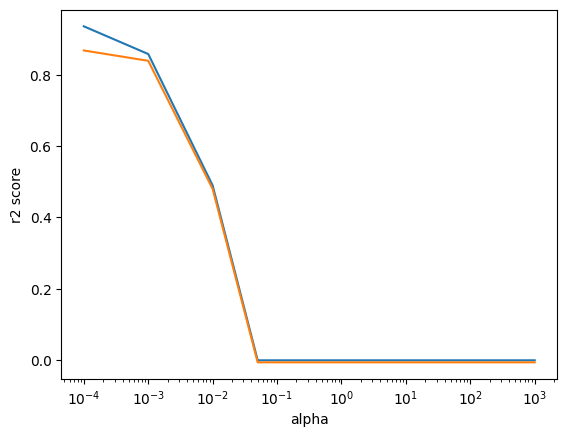

In [86]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [88]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np

# Define functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm1_lasso = Lasso(alpha=0.001)
lm1_lasso.fit(X_train, y_train)

# Predict
y_train_pred = lm1_lasso.predict(X_train)
y_test_pred = lm1_lasso.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm1_lasso.coef_ != 0)))
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.8523554234854849
Test R2 Score => 0.8305185848070978
Count of variables => 35

Trained AIC => -5942.438246886339
Test AIC => -2177.9284943767025

Trained BIC => -4656.089876345361
Test BIC => -1112.4693587684499


In [89]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np

# Define functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm2_lasso = Lasso(alpha=0.01)
lm2_lasso.fit(X_train, y_train)

# Predict
y_train_pred = lm2_lasso.predict(X_train)
y_test_pred = lm2_lasso.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm2_lasso.coef_ != 0)))
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.48914330292507713
Test R2 Score => 0.4686144592892073
Count of variables => 11

Trained AIC => -4675.090101719583
Test AIC => -1677.4063826929018

Trained BIC => -3388.7417311786053
Test BIC => -611.9472470846492


In [90]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np

# Define functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm3_lasso = Lasso(alpha=0.1)
lm3_lasso.fit(X_train, y_train)

# Predict
y_train_pred = lm3_lasso.predict(X_train)
y_test_pred = lm3_lasso.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm3_lasso.coef_ != 0)))
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.0
Test R2 Score => -0.00030262183303753076
Count of variables => 0

Trained AIC => -3989.318947907381
Test AIC => -1400.340708728716

Trained BIC => -2702.970577366403
Test BIC => -334.8815731204634


In [91]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np

# Define functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm4_lasso = Lasso(alpha=0.0001)
lm4_lasso.fit(X_train, y_train)

# Predict
y_train_pred = lm4_lasso.predict(X_train)
y_test_pred = lm4_lasso.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm4_lasso.coef_ != 0)))
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.930519466060732
Test R2 Score => 0.8211776584803463
Count of variables => 120

Trained AIC => -6712.028482465102
Test AIC => -2154.4299995469273

Trained BIC => -5425.6801119241245
Test BIC => -1088.9708639386747


In [92]:
# ridge model parameters
lasso_model_parameters = list(lm1_lasso.coef_)
lasso_model_parameters.insert(0, lm1_lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, lasso_model_parameters))

[('constant', -0.023),
 ('MSSubClass', -0.01),
 ('LotFrontage', 0.0),
 ('LotArea', 0.027),
 ('OverallQual', 0.122),
 ('OverallCond', 0.006),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.02),
 ('MasVnrArea', 0.003),
 ('BsmtFinSF1', 0.033),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.05),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.145),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.018),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.0),
 ('GarageArea', 0.032),
 ('WoodDeckSF', 0.002),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('YrSold', -0.0),
 ('MSZoning_fv', 0.0),
 ('MSZoning_rh', -0.0),
 ('MSZoning_rl', 0.0),
 ('MSZoning_rm', -0.007),
 ('Street_pave', 0.0),
 ('Alley_grvl', -0.0),
 ('Alley_pave', 0.0),
 (

In [93]:
lm1_lasso.get_params()

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [94]:
from operator import itemgetter

variables = sorted(list(zip(cols, lasso_model_parameters)),key=itemgetter(1))

for v in variables:
    if v[1] != 0 and abs(v[1]) > 0.01 :
        print(str(v[0]) + ' : ' + str(round(v[1],2)))

constant : -0.02
ExterQual_ta : -0.01
Neighborhood_nridght : 0.02
BsmtExposure_gd : 0.02
Fireplaces : 0.02
YearRemodAdd : 0.02
LotArea : 0.03
GarageArea : 0.03
BsmtFinSF1 : 0.03
Neighborhood_noridge : 0.04
TotalBsmtSF : 0.05
BsmtQual_ex : 0.06
OverallQual : 0.12
GrLivArea : 0.14


In [95]:
ridge_variables = []

for v in variables:
    if v[1] != 0 and v[0]!='constant':
        ridge_variables.append(v[0])

ridge_variables

['ExterQual_ta',
 'MSSubClass',
 'BsmtExposure_no',
 'KitchenQual_ta',
 'MSZoning_rm',
 'Neighborhood_edwards',
 'BsmtQual_ta',
 'HeatingQC_ta',
 'Neighborhood_somerst',
 'FireplaceQu_gd',
 'WoodDeckSF',
 'CentralAir_y',
 'GarageType_attchd',
 'SaleType_new',
 'MasVnrArea',
 'Foundation_pconc',
 'OverallCond',
 'BsmtFinType1_glq',
 'Functional_typ',
 'Condition1_norm',
 'GarageFinish_fin',
 'Neighborhood_nridght',
 'BsmtExposure_gd',
 'Fireplaces',
 'YearRemodAdd',
 'LotArea',
 'GarageArea',
 'BsmtFinSF1',
 'Neighborhood_noridge',
 'TotalBsmtSF',
 'BsmtQual_ex',
 'OverallQual',
 'GrLivArea']

In [96]:
X_train = X_train[ridge_variables]

In [97]:
X_test = X_test[ridge_variables]

In [98]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [99]:
model_cv.best_params_

{'alpha': 1.0}

In [100]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.045324      0.015287         0.012013        0.005783      0.0001   
1       0.019250      0.002868         0.007942        0.003662       0.001   
2       0.013141      0.005965         0.004865        0.000167        0.01   
3       0.013975      0.005382         0.005754        0.001058        0.05   
4       0.056395      0.031263         0.024013        0.008937         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.879260           0.811228           0.847661   
1   {'alpha': 0.001}           0.879262           0.811225           0.847663   
2    {'alpha': 0.01}           0.879286           0.811195           0.847688   
3    {'alpha': 0.05}           0.879388           0.811059           0.847797   
4     {'alpha': 0.1}           0.879515           0.810891           0.847930   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.874004  ...         0.854254        0.024223               16   
1           0.874007  ...         0.854255        0.024225               15   
2           0.874037  ...         0.854263        0.024243               14   
3           0.874166  ...         0.854297        0.024327               13   
4           0.874325  ...         0.854338        0.024430               12   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.864378            0.883130            0.871905   
1            0.864378            0.883130            0.871905   
2            0.864378            0.883130            0.871905   
3            0.864378            0.883129            0.871904   
4            0.864375            0.883127            0.871901   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.866250            0.868134          0.870759         0.006668  
1            0.866250            0.868134          0.870759         0.006668  
2            0.866250            0.868134          0.870759         0.006668  
3            0.866249            0.868133          0.870759         0.006668  
4            0.866246            0.868131          0.870756         0.006668  

[5 rows x 21 columns]

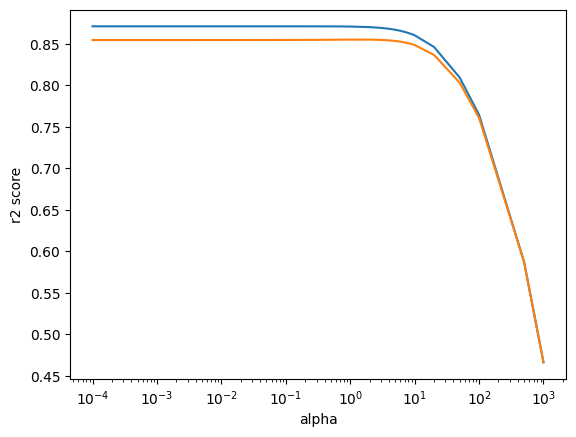

In [101]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [102]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

# Assuming you have defined functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm1_ridge = Ridge(alpha=100)
lm1_ridge.fit(X_train, y_train)

# Predict
y_train_pred = lm1_ridge.predict(X_train)
y_test_pred = lm1_ridge.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm1_ridge.coef_ != 0)))
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.7787622909019386
Test R2 Score => 0.7530389248903007
Count of variables => 33

Trained AIC => -5985.515365167174
Test AIC => -2469.0269879343928

Trained BIC => -5822.87361716774
Test BIC => -2334.31376389197


In [103]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

# Assuming you have defined functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm2_ridge = Ridge(alpha=10)
lm2_ridge.fit(X_train, y_train)

# Predict
y_train_pred = lm2_ridge.predict(X_train)
y_test_pred = lm2_ridge.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm2_ridge.coef_ != 0)))  # Corrected to lm2_ridge
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.860804468698912
Test R2 Score => 0.8366306764129496
Count of variables => 33

Trained AIC => -6458.603970547274
Test AIC => -2650.0161683586657

Trained BIC => -6295.96222254784
Test BIC => -2515.302944316243


In [104]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

# Assuming you have defined functions for AIC and BIC
def calculate_aic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    aic = 2 * k + len(y_true) * np.log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, k):
    resid = y_true - y_pred
    sse = np.sum(resid**2)
    bic = np.log(len(y_true)) * k + len(y_true) * np.log(sse / len(y_true))
    return bic

# Model with optimal alpha
lm3_ridge = Ridge(alpha=1)
lm3_ridge.fit(X_train, y_train)

# Predict
y_train_pred = lm3_ridge.predict(X_train)
y_test_pred = lm3_ridge.predict(X_test)

print("Trained R2 Score => " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Test R2 Score => " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Count of variables => " + str(np.sum(lm3_ridge.coef_ != 0)))  # Corrected to lm3_ridge
print('')
print("Trained AIC => " + str(calculate_aic(y_train, y_train_pred, len(X_train.columns))))
print("Test AIC => " + str(calculate_aic(y_test, y_test_pred, len(X_train.columns))))
print('')
print("Trained BIC => " + str(calculate_bic(y_train, y_train_pred, len(X_train.columns))))
print("Test BIC => " + str(calculate_bic(y_test, y_test_pred, len(X_train.columns))))


Trained R2 Score => 0.8685874348840947
Test R2 Score => 0.8441419900544245
Count of variables => 33

Trained AIC => -6517.350185084018
Test AIC => -2670.6319639829367

Trained BIC => -6354.708437084584
Test BIC => -2535.918739940514


In [105]:
# ridge model parameters
ridge_model_parameters = list(lm3_ridge.coef_)
ridge_model_parameters.insert(0, lm3_ridge.intercept_)
ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, ridge_model_parameters))

[('constant', -0.072),
 ('ExterQual_ta', -0.008),
 ('MSSubClass', -0.02),
 ('BsmtExposure_no', -0.012),
 ('KitchenQual_ta', -0.004),
 ('MSZoning_rm', -0.008),
 ('Neighborhood_edwards', -0.017),
 ('BsmtQual_ta', -0.004),
 ('HeatingQC_ta', -0.002),
 ('Neighborhood_somerst', 0.029),
 ('FireplaceQu_gd', -0.002),
 ('WoodDeckSF', 0.007),
 ('CentralAir_y', 0.006),
 ('GarageType_attchd', -0.001),
 ('SaleType_new', 0.012),
 ('MasVnrArea', 0.0),
 ('Foundation_pconc', 0.003),
 ('OverallCond', 0.03),
 ('BsmtFinType1_glq', 0.004),
 ('Functional_typ', 0.019),
 ('Condition1_norm', 0.019),
 ('GarageFinish_fin', 0.01),
 ('Neighborhood_nridght', 0.039),
 ('BsmtExposure_gd', 0.021),
 ('Fireplaces', 0.028),
 ('YearRemodAdd', 0.014),
 ('LotArea', 0.033),
 ('GarageArea', 0.026),
 ('BsmtFinSF1', 0.04),
 ('Neighborhood_noridge', 0.074),
 ('TotalBsmtSF', 0.052),
 ('BsmtQual_ex', 0.055),
 ('OverallQual', 0.129),
 ('GrLivArea', 0.154)]

In [106]:
lm3_ridge.get_params()

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [107]:
from operator import itemgetter

variables = sorted(list(zip(cols, ridge_model_parameters)),key=itemgetter(1))

for v in variables:
    if v[1] != 0 and abs(v[1]) > 0.01 :
        print(str(v[0]) + ' : ' + str(round(v[1],2)))

constant : -0.07
MSSubClass : -0.02
Neighborhood_edwards : -0.02
BsmtExposure_no : -0.01
SaleType_new : 0.01
YearRemodAdd : 0.01
Functional_typ : 0.02
Condition1_norm : 0.02
BsmtExposure_gd : 0.02
GarageArea : 0.03
Fireplaces : 0.03
Neighborhood_somerst : 0.03
OverallCond : 0.03
LotArea : 0.03
Neighborhood_nridght : 0.04
BsmtFinSF1 : 0.04
TotalBsmtSF : 0.05
BsmtQual_ex : 0.06
Neighborhood_noridge : 0.07
OverallQual : 0.13
GrLivArea : 0.15
